In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import argparse
import os
import time
import random
import maxflow
import tensorflow as tf
from tensorflow import keras

In [2]:
def convertBinarytoDecimal(binary):
    binary = binary.astype(np.int64)
    decimal = int("".join(str(x) for x in binary), 2)
    max = pow(2,len(binary))-1
    return int(decimal*(255/max))

def cslbp(block, tau=30):
    block = block.astype(np.int32)
    def lbpSimp(x1, x2, tau=32):
        if (x1 < x2):
                return 0
        else:
            return 1
    arr = np.zeros((4,2),np.float32)
    arr[0] = lbpSimp(block[0][1], block[2][1])
    arr[1] = lbpSimp(block[0][2], block[2][0])
    arr[2] = lbpSimp(block[1][2], block[1][0])
    arr[3] = lbpSimp(block[2][2], block[0][0])
    return arr.ravel()

In [3]:
#dataSet: "cifar10" or "mnist"   #dataPart: "train" or "test"
def extract_CSLBP(frame, dataSet, dataPart, orderNumber, tau=5):
    H = np.shape(frame)[0]
    W = np.shape(frame)[1]
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    lsbp = np.zeros((H-2, W-2), np.int64)
    for i in range(H-2):
        for j in range(W-2):
            lsbp[i,j] = convertBinarytoDecimal(cslbp(g[i:i+3,j:j+3], g[i+1,j+1]))
    saveImgFeature(lsbp, dataSet, dataPart, orderNumber)
    return lsbp

def saveImgFeature(lsbp, dataSet, dataPart, orderNumber):
    cv2.imwrite(f'C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/{dataSet}/cslbp/{dataPart}/img{orderNumber}.jpg', lsbp)

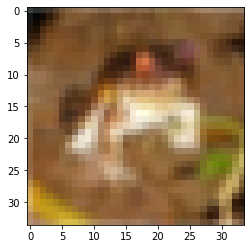

In [4]:
plt.imshow(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/train/img0.png"))

(32, 32)


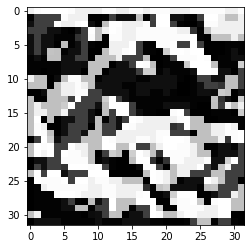

In [5]:
lsbp = extract_CSLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/train/img0.png"), "cifar10", "train", 0)
print(np.shape(lsbp))
plt.imshow(lsbp, cmap='gray')

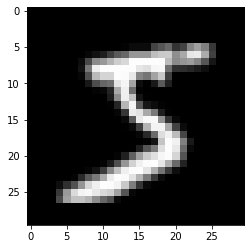

In [6]:
plt.imshow(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/mnist/origin/train/img0.png"))

(28, 28)


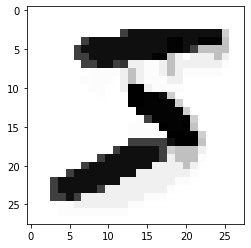

In [7]:
lsbp = extract_CSLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/mnist/origin/train/img0.png"), "mnist", "train", 0)
print(np.shape(lsbp))
plt.imshow(lsbp, cmap='gray')

In [5]:
(train_images1, train_labels1), (test_images1, test_labels1) = keras.datasets.cifar10.load_data()
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.mnist.load_data()

In [9]:
#cifar10
np.shape(train_images1), np.shape(train_labels1), np.shape(test_images1), np.shape(test_labels1)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [10]:
#mnist
np.shape(train_images2), np.shape(train_labels2), np.shape(test_images2), np.shape(test_labels2)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
#cifar10 - train - 50000 - 32,32,3
for i in range(np.shape(train_images1)[0]):
    lsbp = extract_CSLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/train/img{i}.png"), "cifar10", "train", i)
    print(f'Image {i} ({np.shape(lsbp)}): cifar10 - train - 50000 - 32,32,3')

Image 0 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18 ((32, 32)):

Image 157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 171 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 172 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 173 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 174 ((32, 32)): cifar10 - train - 50000 - 

Image 308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 325 ((32, 32)): cifar10 - train - 50000 - 

Image 457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 474 ((32, 32)): cifar10 - train - 50000 - 

Image 609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 626 ((32, 32)): cifar10 - train - 50000 - 

Image 758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 775 ((32, 32)): cifar10 - train - 50000 - 

Image 915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 932 ((32, 32)): cifar10 - train - 50000 - 

Image 1074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1091 ((32, 32)): cifar10 

Image 1230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1247 ((32, 32)): cifar10 

Image 1385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1402 ((32, 32)): cifar10 

Image 1536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1553 ((32, 32)): cifar10 

Image 1681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1698 ((32, 32)): cifar10 

Image 1834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1851 ((32, 32)): cifar10 

Image 1987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 1999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2004 ((32, 32)): cifar10 

Image 2141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2158 ((32, 32)): cifar10 

Image 2290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2307 ((32, 32)): cifar10 

Image 2435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2452 ((32, 32)): cifar10 

Image 2590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2607 ((32, 32)): cifar10 

Image 2737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2754 ((32, 32)): cifar10 

Image 2883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 2900 ((32, 32)): cifar10 

Image 3029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3046 ((32, 32)): cifar10 

Image 3174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3191 ((32, 32)): cifar10 

Image 3331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3348 ((32, 32)): cifar10 

Image 3481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3498 ((32, 32)): cifar10 

Image 3632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3649 ((32, 32)): cifar10 

Image 3785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3802 ((32, 32)): cifar10 

Image 3936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 3953 ((32, 32)): cifar10 

Image 4080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4097 ((32, 32)): cifar10 

Image 4233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4250 ((32, 32)): cifar10 

Image 4386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4403 ((32, 32)): cifar10 

Image 4540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4557 ((32, 32)): cifar10 

Image 4688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4705 ((32, 32)): cifar10 

Image 4839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4856 ((32, 32)): cifar10 

Image 4990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 4999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5007 ((32, 32)): cifar10 

Image 5134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5151 ((32, 32)): cifar10 

Image 5280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5281 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5297 ((32, 32)): cifar10 

Image 5435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5452 ((32, 32)): cifar10 

Image 5587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5604 ((32, 32)): cifar10 

Image 5736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5753 ((32, 32)): cifar10 

Image 5890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 5907 ((32, 32)): cifar10 

Image 6034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6051 ((32, 32)): cifar10 

Image 6181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6198 ((32, 32)): cifar10 

Image 6333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6350 ((32, 32)): cifar10 

Image 6485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6502 ((32, 32)): cifar10 

Image 6641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6658 ((32, 32)): cifar10 

Image 6789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6806 ((32, 32)): cifar10 

Image 6939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 6956 ((32, 32)): cifar10 

Image 7095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7112 ((32, 32)): cifar10 

Image 7247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7264 ((32, 32)): cifar10 

Image 7402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7419 ((32, 32)): cifar10 

Image 7549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7566 ((32, 32)): cifar10 

Image 7698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7715 ((32, 32)): cifar10 

Image 7854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 7871 ((32, 32)): cifar10 

Image 8008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8025 ((32, 32)): cifar10 

Image 8152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8169 ((32, 32)): cifar10 

Image 8300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8317 ((32, 32)): cifar10 

Image 8448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8465 ((32, 32)): cifar10 

Image 8603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8620 ((32, 32)): cifar10 

Image 8756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8773 ((32, 32)): cifar10 

Image 8909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 8926 ((32, 32)): cifar10 

Image 9054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9071 ((32, 32)): cifar10 

Image 9204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9221 ((32, 32)): cifar10 

Image 9359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9376 ((32, 32)): cifar10 

Image 9511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9528 ((32, 32)): cifar10 

Image 9661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9678 ((32, 32)): cifar10 

Image 9809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9826 ((32, 32)): cifar10 

Image 9961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 9978 ((32, 32)): cifar10 

Image 10109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10126 ((

Image 10256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10273 ((

Image 10401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10418 ((

Image 10549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10566 ((

Image 10699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10716 ((

Image 10847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 10864 ((

Image 11001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11018 ((

Image 11152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11169 ((

Image 11304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11321 ((

Image 11453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11470 ((

Image 11602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11619 ((

Image 11749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11766 ((

Image 11903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 11920 ((

Image 12055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12072 ((

Image 12208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12225 ((

Image 12360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12377 ((

Image 12511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12528 ((

Image 12656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12673 ((

Image 12807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12824 ((

Image 12957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 12974 ((

Image 13109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13126 ((

Image 13254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13271 ((

Image 13396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13413 ((

Image 13546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13563 ((

Image 13696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13713 ((

Image 13849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 13866 ((

Image 14002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14019 ((

Image 14149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14166 ((

Image 14295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14312 ((

Image 14438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14455 ((

Image 14588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14605 ((

Image 14736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14753 ((

Image 14879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 14896 ((

Image 15030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15047 ((

Image 15177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15194 ((

Image 15327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15344 ((

Image 15472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15489 ((

Image 15618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15635 ((

Image 15764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15781 ((

Image 15911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 15928 ((

Image 16054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16071 ((

Image 16205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16222 ((

Image 16352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16369 ((

Image 16496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16513 ((

Image 16640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16657 ((

Image 16794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16811 ((

Image 16939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 16956 ((

Image 17084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17101 ((

Image 17227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17244 ((

Image 17375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17392 ((

Image 17518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17535 ((

Image 17666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17683 ((

Image 17813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17830 ((

Image 17964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 17981 ((

Image 18106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18123 ((

Image 18251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18268 ((

Image 18397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18414 ((

Image 18543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18560 ((

Image 18685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18702 ((

Image 18827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18844 ((

Image 18969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 18986 ((

Image 19116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19133 ((

Image 19264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19278 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19281 ((

Image 19414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19431 ((

Image 19560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19577 ((

Image 19704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19721 ((

Image 19847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19864 ((

Image 19996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 19999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20013 ((

Image 20145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20162 ((

Image 20291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20308 ((

Image 20441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20458 ((

Image 20585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20602 ((

Image 20729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20731 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20732 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20733 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20734 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20746 ((

Image 20880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 20897 ((

Image 21025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21042 ((

Image 21177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21194 ((

Image 21324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21341 ((

Image 21468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21485 ((

Image 21615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21632 ((

Image 21758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21775 ((

Image 21904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 21921 ((

Image 22048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22065 ((

Image 22195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22212 ((

Image 22342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22359 ((

Image 22493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22510 ((

Image 22635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22652 ((

Image 22782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22799 ((

Image 22935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 22952 ((

Image 23077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23094 ((

Image 23219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23236 ((

Image 23369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23386 ((

Image 23512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23529 ((

Image 23658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23675 ((

Image 23811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23828 ((

Image 23963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 23980 ((

Image 24107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24124 ((

Image 24254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24271 ((

Image 24398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24415 ((

Image 24544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24561 ((

Image 24690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24707 ((

Image 24837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24854 ((

Image 24984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 24999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25001 ((

Image 25126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25129 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25130 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25131 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25143 ((

Image 25275 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25276 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25277 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25278 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25279 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25280 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25281 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25292 ((

Image 25422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25439 ((

Image 25570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25580 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25581 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25582 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25583 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25587 ((

Image 25718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25728 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25731 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25732 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25733 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25734 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25735 ((

Image 25866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25876 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25877 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25878 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 25883 ((

Image 26018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26035 ((

Image 26164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26171 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26172 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26173 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26181 ((

Image 26315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26332 ((

Image 26465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26482 ((

Image 26608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26625 ((

Image 26761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26778 ((

Image 26913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 26930 ((

Image 27056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27073 ((

Image 27204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27221 ((

Image 27356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27373 ((

Image 27505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27522 ((

Image 27654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27665 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27671 ((

Image 27799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27816 ((

Image 27941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27956 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 27958 ((

Image 28089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28106 ((

Image 28231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28248 ((

Image 28373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28390 ((

Image 28519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28536 ((

Image 28672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28689 ((

Image 28815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28832 ((

Image 28960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 28977 ((

Image 29112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29126 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29127 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29128 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29129 ((

Image 29258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29274 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29275 ((

Image 29404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29421 ((

Image 29558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29575 ((

Image 29703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29720 ((

Image 29853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 29870 ((

Image 30000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30017 ((

Image 30148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30165 ((

Image 30300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30303 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30304 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30305 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30306 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30307 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30308 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30309 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30310 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30317 ((

Image 30448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30465 ((

Image 30598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30615 ((

Image 30741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30758 ((

Image 30885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 30902 ((

Image 31032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31049 ((

Image 31179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31196 ((

Image 31322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31339 ((

Image 31465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31482 ((

Image 31617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31634 ((

Image 31760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31777 ((

Image 31905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 31922 ((

Image 32050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32067 ((

Image 32197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32214 ((

Image 32349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32362 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32363 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32366 ((

Image 32501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32513 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32514 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32515 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32516 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32517 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32518 ((

Image 32648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32665 ((

Image 32799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32801 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32802 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32816 ((

Image 32946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32949 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32950 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32951 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32952 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32956 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 32963 ((

Image 33096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33113 ((

Image 33239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33256 ((

Image 33384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33401 ((

Image 33536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33553 ((

Image 33686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33703 ((

Image 33840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33849 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33857 ((

Image 33986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 33999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34001 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34003 ((

Image 34132 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34133 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34134 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34135 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34136 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34149 ((

Image 34283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34300 ((

Image 34425 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34426 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34427 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34428 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34429 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34430 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34431 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34432 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34433 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34434 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34435 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34436 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34442 ((

Image 34574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34580 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34581 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34582 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34583 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34591 ((

Image 34726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34728 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34731 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34732 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34733 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34734 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34743 ((

Image 34869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34876 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34877 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34878 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 34886 ((

Image 35016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35033 ((

Image 35168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35171 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35172 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35173 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35185 ((

Image 35311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35328 ((

Image 35454 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35455 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35456 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35457 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35458 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35471 ((

Image 35604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35605 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35606 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35607 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35608 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35609 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35610 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35621 ((

Image 35756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35758 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35759 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35760 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35761 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35773 ((

Image 35900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35908 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35909 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35910 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35911 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 35917 ((

Image 36050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36056 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36057 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36058 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36059 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36067 ((

Image 36196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36208 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36209 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36210 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36211 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36213 ((

Image 36345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36359 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36360 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36361 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36362 ((

Image 36487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36504 ((

Image 36636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36653 ((

Image 36778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36779 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36795 ((

Image 36932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 36949 ((

Image 37081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37098 ((

Image 37234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37240 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37241 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37251 ((

Image 37382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37384 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37385 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37386 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37387 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37388 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37389 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37390 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37391 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37392 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37399 ((

Image 37526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37540 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37543 ((

Image 37673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37690 ((

Image 37815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37832 ((

Image 37960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 37977 ((

Image 38109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38119 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38120 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38121 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38122 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38123 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38124 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38125 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38126 ((

Image 38251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38268 ((

Image 38397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38414 ((

Image 38541 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38542 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38543 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38544 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38545 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38546 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38558 ((

Image 38683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38686 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38687 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38688 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38689 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38690 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38691 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38692 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38693 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38694 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38695 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38696 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38697 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38698 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38700 ((

Image 38832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38836 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38837 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38838 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38839 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38840 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38841 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38842 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38843 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38844 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38845 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38846 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38847 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38848 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38849 ((

Image 38984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38991 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38992 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38993 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38994 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38995 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38996 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38997 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38998 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 38999 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39000 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39001 ((

Image 39137 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39138 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39139 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39140 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39141 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39142 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39143 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39154 ((

Image 39282 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39283 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39284 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39285 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39299 ((

Image 39437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39454 ((

Image 39581 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39582 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39583 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39584 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39585 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39586 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39587 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39598 ((

Image 39735 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39736 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39737 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39738 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39739 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39740 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39752 ((

Image 39884 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39885 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39886 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39887 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39888 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39889 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39890 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 39901 ((

Image 40034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40051 ((

Image 40183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40200 ((

Image 40326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40335 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40336 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40337 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40338 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40339 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40340 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40341 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40343 ((

Image 40479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40487 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40488 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40489 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40490 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40491 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40492 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40493 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40494 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40495 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40496 ((

Image 40633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40641 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40642 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40643 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40644 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40645 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40646 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40647 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40650 ((

Image 40784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40797 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40798 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40799 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40800 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40801 ((

Image 40929 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40930 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40931 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 40946 ((

Image 41073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41077 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41078 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41079 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41080 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41081 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41082 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41083 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41084 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41085 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41086 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41090 ((

Image 41223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41229 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41230 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41231 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41232 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41233 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41234 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41235 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41236 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41237 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41238 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41239 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41240 ((

Image 41367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41381 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41382 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41383 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41384 ((

Image 41523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41535 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41536 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41537 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41538 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41539 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41540 ((

Image 41666 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41667 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41668 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41683 ((

Image 41808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41825 ((

Image 41959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41970 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41971 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41972 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41973 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 41976 ((

Image 42102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42118 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42119 ((

Image 42257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42270 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42271 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42272 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42273 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42274 ((

Image 42408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42425 ((

Image 42563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42575 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42576 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42577 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42578 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42579 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42580 ((

Image 42717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42727 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42728 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42729 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42730 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42731 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42732 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42733 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42734 ((

Image 42867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42876 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42877 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42878 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42879 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42880 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42881 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42882 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42883 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 42884 ((

Image 43022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43024 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43025 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43026 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43027 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43028 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43029 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43030 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43031 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43032 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43033 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43034 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43035 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43036 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43037 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43038 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43039 ((

Image 43174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43177 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43178 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43179 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43180 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43181 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43182 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43183 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43184 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43185 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43186 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43187 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43188 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43189 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43190 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43191 ((

Image 43318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43328 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43329 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43330 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43331 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43332 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43333 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43334 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43335 ((

Image 43470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43476 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43477 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43478 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43479 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43480 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43481 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43482 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43483 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43484 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43485 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43486 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43487 ((

Image 43624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43628 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43629 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43630 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43631 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43632 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43633 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43634 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43635 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43636 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43637 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43638 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43639 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43640 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43641 ((

Image 43780 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43781 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43782 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43783 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43784 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43785 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43786 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43787 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43788 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43789 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43790 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43791 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43792 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43793 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43794 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43795 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43796 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43797 ((

Image 43932 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43933 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43934 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43935 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43936 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43937 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43938 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43939 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43940 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43941 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43942 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43943 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43944 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43945 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43946 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43947 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43948 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 43949 ((

Image 44087 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44088 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44089 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44090 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44091 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44092 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44093 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44094 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44095 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44096 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44097 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44098 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44099 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44100 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44104 ((

Image 44242 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44243 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44244 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44245 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44246 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44247 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44248 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44249 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44250 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44251 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44252 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44259 ((

Image 44393 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44394 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44395 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44396 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44397 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44398 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44399 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44400 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44401 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44402 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44403 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44404 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44405 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44406 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44407 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44410 ((

Image 44547 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44548 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44549 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44550 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44551 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44552 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44553 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44554 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44555 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44556 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44557 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44564 ((

Image 44699 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44700 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44701 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44702 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44703 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44704 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44705 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44706 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44707 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44708 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44709 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44716 ((

Image 44850 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44851 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44852 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44853 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44854 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44855 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44856 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44857 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44858 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 44867 ((

Image 45002 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45003 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45004 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45005 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45006 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45019 ((

Image 45144 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45145 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45146 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45147 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45148 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45149 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45150 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45151 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45152 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45153 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45154 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45155 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45156 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45157 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45158 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45159 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45161 ((

Image 45286 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45287 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45288 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45289 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45290 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45291 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45292 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45293 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45294 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45295 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45296 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45297 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45298 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45299 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45300 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45301 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45302 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45303 ((

Image 45437 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45438 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45439 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45440 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45441 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45442 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45443 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45444 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45445 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45446 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45447 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45448 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45449 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45450 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45451 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45452 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45453 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45454 ((

Image 45588 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45589 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45590 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45591 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45592 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45593 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45594 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45595 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45596 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45597 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45598 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45599 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45600 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45601 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45602 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45603 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45604 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45605 ((

Image 45741 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45742 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45743 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45744 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45745 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45746 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45747 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45748 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45749 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45750 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45751 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45752 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45753 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45754 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45755 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45756 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45757 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45758 ((

Image 45891 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45892 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45893 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45894 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45895 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45896 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45897 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45898 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45899 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45900 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45901 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45902 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45903 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45904 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45905 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45906 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45907 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 45908 ((

Image 46039 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46040 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46041 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46042 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46043 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46044 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46045 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46046 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46047 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46048 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46049 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46050 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46051 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46052 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46053 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46054 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46055 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46056 ((

Image 46191 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46192 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46193 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46194 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46195 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46196 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46197 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46198 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46199 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46200 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46201 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46202 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46203 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46204 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46205 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46206 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46207 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46208 ((

Image 46342 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46343 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46344 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46345 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46346 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46347 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46348 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46349 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46350 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46351 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46352 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46353 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46354 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46355 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46356 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46357 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46358 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46359 ((

Image 46496 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46497 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46498 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46499 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46500 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46501 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46502 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46503 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46504 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46505 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46506 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46507 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46508 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46509 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46510 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46511 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46512 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46513 ((

Image 46648 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46649 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46650 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46651 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46652 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46653 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46654 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46655 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46656 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46657 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46658 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46659 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46660 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46661 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46662 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46663 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46664 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46665 ((

Image 46803 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46804 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46805 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46806 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46807 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46808 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46809 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46810 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46811 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46812 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46813 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46814 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46815 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46816 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46817 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46818 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46820 ((

Image 46953 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46954 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46955 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46956 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46957 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46958 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46959 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46960 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46961 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46962 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46963 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46964 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46965 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46966 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46967 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46968 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46969 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 46970 ((

Image 47101 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47102 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47103 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47104 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47105 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47106 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47107 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47108 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47109 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47110 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47111 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47112 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47113 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47114 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47115 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47116 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47117 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47118 ((

Image 47253 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47254 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47255 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47256 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47257 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47258 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47259 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47260 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47261 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47262 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47263 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47264 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47265 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47266 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47267 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47268 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47269 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47270 ((

Image 47408 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47409 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47410 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47411 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47412 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47413 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47414 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47415 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47416 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47417 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47418 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47419 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47420 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47421 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47422 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47423 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47424 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47425 ((

Image 47558 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47559 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47560 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47561 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47562 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47563 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47564 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47565 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47566 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47567 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47568 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47569 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47570 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47571 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47572 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47573 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47574 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47575 ((

Image 47710 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47711 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47712 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47713 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47714 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47715 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47716 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47717 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47718 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47719 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47720 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47721 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47722 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47723 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47724 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47725 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47726 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47727 ((

Image 47859 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47860 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47861 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47862 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47863 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47864 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47865 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47866 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47867 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47868 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47869 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47870 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47871 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47872 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47873 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47874 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47875 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 47876 ((

Image 48007 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48008 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48009 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48010 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48011 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48012 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48013 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48014 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48015 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48016 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48017 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48018 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48019 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48020 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48021 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48022 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48023 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48024 ((

Image 48160 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48161 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48162 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48163 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48164 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48165 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48166 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48167 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48168 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48169 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48170 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48171 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48172 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48173 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48174 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48175 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48176 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48177 ((

Image 48311 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48312 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48313 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48314 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48315 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48316 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48317 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48318 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48319 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48320 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48321 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48322 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48323 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48324 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48325 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48326 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48327 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48328 ((

Image 48459 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48460 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48461 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48462 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48463 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48464 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48465 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48466 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48467 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48468 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48469 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48470 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48471 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48472 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48473 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48474 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48475 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48476 ((

Image 48611 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48612 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48613 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48614 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48615 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48616 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48617 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48618 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48619 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48620 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48621 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48622 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48623 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48624 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48625 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48626 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48627 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48628 ((

Image 48762 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48763 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48764 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48765 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48766 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48767 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48768 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48769 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48770 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48771 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48772 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48773 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48774 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48775 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48776 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48777 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48778 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48779 ((

Image 48912 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48913 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48914 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48915 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48916 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48917 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48918 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48919 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48920 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48921 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48922 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48923 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48924 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48925 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48926 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48927 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48928 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 48929 ((

Image 49060 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49061 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49062 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49063 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49064 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49065 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49066 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49067 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49068 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49069 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49070 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49071 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49072 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49073 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49074 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49075 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49076 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49077 ((

Image 49212 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49213 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49214 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49215 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49216 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49217 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49218 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49219 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49220 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49221 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49222 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49223 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49224 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49225 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49226 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49227 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49228 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49229 ((

Image 49364 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49365 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49366 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49367 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49368 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49369 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49370 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49371 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49372 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49373 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49374 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49375 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49376 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49377 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49378 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49379 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49380 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49381 ((

Image 49518 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49519 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49520 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49521 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49522 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49523 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49524 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49525 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49526 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49527 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49528 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49529 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49530 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49531 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49532 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49533 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49534 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49535 ((

Image 49669 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49670 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49671 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49672 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49673 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49674 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49675 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49676 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49677 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49678 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49679 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49680 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49681 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49682 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49683 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49684 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49685 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49686 ((

Image 49819 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49820 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49821 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49822 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49823 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49824 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49825 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49826 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49827 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49828 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49829 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49830 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49831 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49832 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49833 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49834 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49835 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49836 ((

Image 49974 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49975 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49976 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49977 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49978 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49979 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49980 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49981 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49982 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49983 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49984 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49985 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49986 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49987 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49988 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49989 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49990 ((32, 32)): cifar10 - train - 50000 - 32,32,3
Image 49991 ((

In [6]:
#cifar10 - test - 10000 - 32,32,3
for i in range(np.shape(test_images1)[0]):
    lsbp = extract_CSLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/cifar10/origin/test/img{i}.png"), "cifar10", "test", i)
    print(f'Image {i} ({np.shape(lsbp)}): cifar10 - test - 10000 - 32,32,3')

Image 0 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 10 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 11 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 12 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 13 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 14 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 15 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 16 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 17 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 18 ((32, 32)): cifar10 - test - 

Image 158 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 159 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 160 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 161 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 162 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 163 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 164 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 165 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 166 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 167 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 168 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 169 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 170 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 171 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 172 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 173 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 174 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 175 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 176 

Image 315 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 316 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 317 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 318 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 319 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 320 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 321 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 322 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 323 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 324 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 325 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 326 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 327 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 328 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 329 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 330 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 331 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 332 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 333 

Image 474 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 475 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 476 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 477 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 478 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 479 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 480 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 481 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 482 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 483 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 484 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 485 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 486 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 487 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 488 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 489 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 490 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 491 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 492 

Image 626 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 627 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 628 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 629 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 630 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 631 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 632 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 633 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 634 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 635 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 636 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 637 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 638 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 639 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 640 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 641 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 642 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 643 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 644 

Image 775 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 776 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 777 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 778 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 779 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 780 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 781 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 782 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 783 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 784 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 785 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 786 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 787 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 788 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 789 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 790 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 791 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 792 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 793 

Image 935 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 936 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 937 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 938 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 939 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 940 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 941 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 942 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 943 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 944 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 945 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 946 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 947 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 948 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 949 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 950 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 951 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 952 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 953 

Image 1087 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1088 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1089 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1090 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1091 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1092 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1093 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1094 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1095 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1096 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1097 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1098 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1099 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1100 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1101 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1102 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1103 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1104 ((32, 32)): cifar10 - test - 10000 - 

Image 1235 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1236 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1237 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1238 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1239 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1240 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1241 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1242 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1243 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1244 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1245 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1246 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1247 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1248 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1249 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1250 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1251 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1252 ((32, 32)): cifar10 - test - 10000 - 

Image 1387 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1388 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1389 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1390 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1391 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1392 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1393 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1394 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1395 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1396 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1397 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1398 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1399 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1400 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1401 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1402 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1403 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1404 ((32, 32)): cifar10 - test - 10000 - 

Image 1548 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1549 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1550 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1551 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1552 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1553 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1554 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1555 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1556 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1557 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1558 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1559 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1560 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1561 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1562 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1563 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1564 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1565 ((32, 32)): cifar10 - test - 10000 - 

Image 1700 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1701 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1702 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1703 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1704 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1705 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1706 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1707 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1708 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1709 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1710 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1711 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1712 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1713 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1714 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1715 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1716 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1717 ((32, 32)): cifar10 - test - 10000 - 

Image 1853 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1854 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1855 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1856 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1857 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1858 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1859 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1860 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1861 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1862 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1863 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1864 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1865 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1866 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1867 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1868 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1869 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 1870 ((32, 32)): cifar10 - test - 10000 - 

Image 2013 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2014 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2015 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2016 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2017 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2018 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2019 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2020 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2021 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2022 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2023 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2024 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2025 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2026 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2027 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2028 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2029 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2030 ((32, 32)): cifar10 - test - 10000 - 

Image 2168 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2169 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2170 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2171 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2172 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2173 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2174 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2175 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2176 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2177 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2178 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2179 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2180 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2181 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2182 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2183 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2184 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2185 ((32, 32)): cifar10 - test - 10000 - 

Image 2327 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2328 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2329 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2330 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2331 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2332 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2333 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2334 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2335 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2336 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2337 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2338 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2339 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2340 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2341 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2342 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2343 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2344 ((32, 32)): cifar10 - test - 10000 - 

Image 2478 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2479 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2480 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2481 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2482 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2483 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2484 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2485 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2486 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2487 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2488 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2489 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2490 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2491 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2492 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2493 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2494 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2495 ((32, 32)): cifar10 - test - 10000 - 

Image 2625 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2626 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2627 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2628 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2629 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2630 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2631 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2632 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2633 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2634 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2635 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2636 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2637 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2638 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2639 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2640 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2641 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2642 ((32, 32)): cifar10 - test - 10000 - 

Image 2777 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2778 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2779 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2780 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2781 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2782 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2783 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2784 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2785 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2786 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2787 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2788 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2789 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2790 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2791 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2792 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2793 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2794 ((32, 32)): cifar10 - test - 10000 - 

Image 2928 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2929 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2930 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2931 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2932 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2933 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2934 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2935 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2936 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2937 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2938 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2939 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2940 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2941 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2942 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2943 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2944 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 2945 ((32, 32)): cifar10 - test - 10000 - 

Image 3080 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3081 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3082 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3083 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3084 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3085 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3086 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3087 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3088 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3089 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3090 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3091 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3092 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3093 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3094 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3095 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3096 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3097 ((32, 32)): cifar10 - test - 10000 - 

Image 3230 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3231 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3232 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3233 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3234 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3235 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3236 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3237 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3238 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3239 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3240 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3241 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3242 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3243 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3244 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3245 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3246 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3247 ((32, 32)): cifar10 - test - 10000 - 

Image 3377 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3378 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3379 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3380 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3381 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3382 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3383 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3384 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3385 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3386 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3387 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3388 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3389 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3390 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3391 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3392 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3393 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3394 ((32, 32)): cifar10 - test - 10000 - 

Image 3528 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3529 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3530 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3531 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3532 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3533 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3534 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3535 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3536 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3537 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3538 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3539 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3540 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3541 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3542 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3543 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3544 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3545 ((32, 32)): cifar10 - test - 10000 - 

Image 3676 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3677 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3678 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3679 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3680 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3681 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3682 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3683 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3684 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3685 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3686 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3687 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3688 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3689 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3690 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3691 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3692 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3693 ((32, 32)): cifar10 - test - 10000 - 

Image 3827 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3828 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3829 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3830 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3831 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3832 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3833 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3834 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3835 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3836 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3837 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3838 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3839 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3840 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3841 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3842 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3843 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3844 ((32, 32)): cifar10 - test - 10000 - 

Image 3975 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3976 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3977 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3978 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3979 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3980 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3981 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3982 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3983 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3984 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3985 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3986 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3987 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3988 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3989 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3990 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3991 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 3992 ((32, 32)): cifar10 - test - 10000 - 

Image 4123 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4124 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4125 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4126 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4127 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4128 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4129 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4130 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4131 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4132 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4133 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4134 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4135 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4136 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4137 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4138 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4139 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4140 ((32, 32)): cifar10 - test - 10000 - 

Image 4274 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4275 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4276 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4277 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4278 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4279 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4280 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4281 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4282 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4283 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4284 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4285 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4286 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4287 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4288 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4289 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4290 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4291 ((32, 32)): cifar10 - test - 10000 - 

Image 4435 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4436 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4437 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4438 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4439 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4440 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4441 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4442 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4443 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4444 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4445 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4446 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4447 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4448 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4449 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4450 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4451 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4452 ((32, 32)): cifar10 - test - 10000 - 

Image 4585 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4586 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4587 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4588 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4589 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4590 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4591 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4592 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4593 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4594 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4595 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4596 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4597 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4598 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4599 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4600 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4601 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4602 ((32, 32)): cifar10 - test - 10000 - 

Image 4733 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4734 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4735 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4736 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4737 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4738 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4739 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4740 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4741 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4742 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4743 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4744 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4745 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4746 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4747 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4748 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4749 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4750 ((32, 32)): cifar10 - test - 10000 - 

Image 4883 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4884 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4885 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4886 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4887 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4888 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4889 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4890 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4891 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4892 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4893 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4894 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4895 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4896 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4897 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4898 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4899 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 4900 ((32, 32)): cifar10 - test - 10000 - 

Image 5032 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5033 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5034 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5035 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5036 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5037 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5038 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5039 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5040 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5041 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5042 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5043 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5044 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5045 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5046 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5047 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5048 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5049 ((32, 32)): cifar10 - test - 10000 - 

Image 5181 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5182 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5183 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5184 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5185 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5186 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5187 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5188 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5189 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5190 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5191 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5192 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5193 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5194 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5195 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5196 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5197 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5198 ((32, 32)): cifar10 - test - 10000 - 

Image 5329 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5330 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5331 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5332 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5333 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5334 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5335 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5336 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5337 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5338 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5339 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5340 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5341 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5342 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5343 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5344 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5345 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5346 ((32, 32)): cifar10 - test - 10000 - 

Image 5480 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5481 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5482 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5483 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5484 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5485 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5486 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5487 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5488 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5489 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5490 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5491 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5492 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5493 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5494 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5495 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5496 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5497 ((32, 32)): cifar10 - test - 10000 - 

Image 5630 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5631 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5632 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5633 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5634 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5635 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5636 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5637 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5638 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5639 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5640 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5641 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5642 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5643 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5644 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5645 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5646 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5647 ((32, 32)): cifar10 - test - 10000 - 

Image 5791 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5792 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5793 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5794 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5795 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5796 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5797 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5798 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5799 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5800 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5801 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5802 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5803 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5804 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5805 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5806 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5807 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5808 ((32, 32)): cifar10 - test - 10000 - 

Image 5941 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5942 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5943 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5944 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5945 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5946 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5947 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5948 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5949 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5950 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5951 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5952 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5953 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5954 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5955 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5956 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5957 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 5958 ((32, 32)): cifar10 - test - 10000 - 

Image 6090 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6091 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6092 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6093 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6094 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6095 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6096 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6097 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6098 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6099 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6100 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6101 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6102 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6103 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6104 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6105 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6106 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6107 ((32, 32)): cifar10 - test - 10000 - 

Image 6251 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6252 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6253 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6254 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6255 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6256 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6257 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6258 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6259 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6260 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6261 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6262 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6263 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6264 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6265 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6266 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6267 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6268 ((32, 32)): cifar10 - test - 10000 - 

Image 6402 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6403 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6404 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6405 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6406 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6407 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6408 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6409 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6410 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6411 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6412 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6413 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6414 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6415 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6416 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6417 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6418 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6419 ((32, 32)): cifar10 - test - 10000 - 

Image 6549 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6550 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6551 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6552 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6553 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6554 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6555 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6556 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6557 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6558 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6559 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6560 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6561 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6562 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6563 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6564 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6565 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6566 ((32, 32)): cifar10 - test - 10000 - 

Image 6697 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6698 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6699 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6700 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6701 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6702 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6703 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6704 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6705 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6706 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6707 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6708 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6709 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6710 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6711 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6712 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6713 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6714 ((32, 32)): cifar10 - test - 10000 - 

Image 6859 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6860 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6861 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6862 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6863 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6864 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6865 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6866 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6867 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6868 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6869 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6870 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6871 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6872 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6873 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6874 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6875 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 6876 ((32, 32)): cifar10 - test - 10000 - 

Image 7018 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7019 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7020 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7021 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7022 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7023 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7024 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7025 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7026 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7027 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7028 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7029 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7030 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7031 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7032 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7033 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7034 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7035 ((32, 32)): cifar10 - test - 10000 - 

Image 7177 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7178 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7179 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7180 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7181 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7182 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7183 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7184 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7185 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7186 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7187 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7188 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7189 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7190 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7191 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7192 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7193 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7194 ((32, 32)): cifar10 - test - 10000 - 

Image 7328 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7329 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7330 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7331 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7332 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7333 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7334 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7335 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7336 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7337 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7338 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7339 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7340 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7341 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7342 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7343 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7344 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7345 ((32, 32)): cifar10 - test - 10000 - 

Image 7478 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7479 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7480 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7481 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7482 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7483 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7484 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7485 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7486 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7487 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7488 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7489 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7490 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7491 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7492 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7493 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7494 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7495 ((32, 32)): cifar10 - test - 10000 - 

Image 7629 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7630 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7631 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7632 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7633 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7634 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7635 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7636 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7637 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7638 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7639 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7640 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7641 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7642 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7643 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7644 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7645 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7646 ((32, 32)): cifar10 - test - 10000 - 

Image 7786 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7787 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7788 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7789 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7790 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7791 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7792 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7793 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7794 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7795 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7796 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7797 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7798 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7799 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7800 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7801 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7802 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7803 ((32, 32)): cifar10 - test - 10000 - 

Image 7946 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7947 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7948 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7949 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7950 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7951 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7952 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7953 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7954 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7955 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7956 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7957 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7958 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7959 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7960 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7961 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7962 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 7963 ((32, 32)): cifar10 - test - 10000 - 

Image 8104 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8105 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8106 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8107 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8108 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8109 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8110 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8111 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8112 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8113 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8114 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8115 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8116 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8117 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8118 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8119 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8120 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8121 ((32, 32)): cifar10 - test - 10000 - 

Image 8259 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8260 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8261 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8262 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8263 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8264 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8265 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8266 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8267 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8268 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8269 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8270 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8271 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8272 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8273 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8274 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8275 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8276 ((32, 32)): cifar10 - test - 10000 - 

Image 8409 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8410 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8411 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8412 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8413 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8414 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8415 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8416 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8417 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8418 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8419 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8420 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8421 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8422 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8423 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8424 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8425 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8426 ((32, 32)): cifar10 - test - 10000 - 

Image 8565 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8566 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8567 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8568 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8569 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8570 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8571 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8572 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8573 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8574 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8575 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8576 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8577 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8578 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8579 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8580 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8581 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8582 ((32, 32)): cifar10 - test - 10000 - 

Image 8725 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8726 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8727 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8728 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8729 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8730 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8731 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8732 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8733 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8734 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8735 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8736 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8737 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8738 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8739 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8740 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8741 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8742 ((32, 32)): cifar10 - test - 10000 - 

Image 8884 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8885 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8886 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8887 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8888 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8889 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8890 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8891 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8892 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8893 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8894 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8895 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8896 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8897 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8898 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8899 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8900 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 8901 ((32, 32)): cifar10 - test - 10000 - 

Image 9038 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9039 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9040 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9041 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9042 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9043 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9044 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9045 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9046 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9047 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9048 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9049 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9050 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9051 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9052 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9053 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9054 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9055 ((32, 32)): cifar10 - test - 10000 - 

Image 9194 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9195 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9196 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9197 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9198 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9199 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9200 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9201 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9202 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9203 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9204 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9205 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9206 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9207 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9208 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9209 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9210 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9211 ((32, 32)): cifar10 - test - 10000 - 

Image 9342 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9343 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9344 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9345 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9346 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9347 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9348 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9349 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9350 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9351 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9352 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9353 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9354 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9355 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9356 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9357 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9358 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9359 ((32, 32)): cifar10 - test - 10000 - 

Image 9502 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9503 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9504 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9505 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9506 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9507 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9508 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9509 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9510 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9511 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9512 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9513 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9514 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9515 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9516 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9517 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9518 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9519 ((32, 32)): cifar10 - test - 10000 - 

Image 9650 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9651 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9652 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9653 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9654 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9655 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9656 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9657 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9658 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9659 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9660 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9661 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9662 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9663 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9664 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9665 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9666 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9667 ((32, 32)): cifar10 - test - 10000 - 

Image 9797 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9798 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9799 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9800 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9801 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9802 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9803 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9804 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9805 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9806 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9807 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9808 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9809 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9810 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9811 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9812 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9813 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9814 ((32, 32)): cifar10 - test - 10000 - 

Image 9955 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9956 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9957 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9958 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9959 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9960 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9961 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9962 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9963 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9964 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9965 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9966 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9967 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9968 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9969 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9970 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9971 ((32, 32)): cifar10 - test - 10000 - 32,32,3
Image 9972 ((32, 32)): cifar10 - test - 10000 - 

In [13]:
#mnist - train - 60000 - 28,28,1
for i in range(np.shape(train_images2)[0]):
    lsbp = extract_CSLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/mnist/origin/train/img{i}.png"), "mnist", "train", i)
    print(f'Image {i} ({np.shape(lsbp)}): mnist - train - 60000 - 28,28,1')

Image 0 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18 ((28, 28)): mnist - train - 60000 - 28,28,1
Ima

Image 167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 185 ((28, 28)): mnist 

Image 321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 339 ((28, 28)): mnist 

Image 475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 493 ((28, 28)): mnist 

Image 631 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 632 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 649 ((28, 28)): mnist 

Image 785 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 786 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 787 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 788 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 789 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 803 ((28, 28)): mnist 

Image 950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 968 ((28, 28)): mnist 

Image 1109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1127

Image 1260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1276 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1278

Image 1410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1428

Image 1574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1584 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1585 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1586 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1587 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1588 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1589 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1590 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1591 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1592

Image 1725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1738 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1739 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1740 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1741 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1742 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1743

Image 1881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1888 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1889 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1894 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1895 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1896 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1897 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1898 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 1899

Image 2038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2044 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2045 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2053 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2054 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2055 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2056

Image 2194 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2197 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2198 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2199 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2203 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2204 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2205 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2212

Image 2354 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2355 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2356 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2357 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2358 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2359 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2370 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2371 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2372

Image 2517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2524 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2525 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2526 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2527 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2530 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2531 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2532 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2533 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2534 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2535

Image 2675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2683 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2684 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2685 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2686 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2687 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2688 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2689 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2690 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2691 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2692 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2693

Image 2832 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2833 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2834 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2835 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2836 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2837 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2838 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2839 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2840 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2841 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2842 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2843 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2844 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2845 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2846 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2847 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2848 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2849 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2850

Image 2991 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2992 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2993 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2994 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2995 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2996 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2997 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2998 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 2999 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3000 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3001 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3002 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3003 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3004 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3005 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3006 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3007 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3009

Image 3148 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3149 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3150 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3151 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3152 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3153 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3154 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3155 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3156 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3157 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3166

Image 3304 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3305 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3306 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3307 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3308 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3309 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3310 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3311 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3312 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3313 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3314 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3315 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3316 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3317 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3322

Image 3455 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3456 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3457 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3458 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3459 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3460 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3461 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3462 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3463 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3464 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3465 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3466 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3467 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3473

Image 3614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3620 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3621 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3622 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3623 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3624 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3625 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3626 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3627 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3628 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3629 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3630 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3631 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3632

Image 3770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3773 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3774 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3775 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3778 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3779 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3780 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3781 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3782 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3783 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3784 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3785 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3786 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3787 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3788

Image 3930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3932 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3933 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3934 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3935 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3936 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3937 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3938 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3939 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3940 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3941 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3942 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3943 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 3948

Image 4086 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4087 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4088 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4089 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4090 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4091 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4092 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4104

Image 4242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4260

Image 4399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4400 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4417

Image 4557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4575

Image 4710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4728

Image 4863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 4881

Image 5026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5044

Image 5179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5190 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5191 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5192 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5193 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5194 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5197

Image 5331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5346 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5347 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5348 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5349

Image 5489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5499 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5500 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5501 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5502 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5503 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5504 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5505 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5506 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5507

Image 5642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5658 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5659 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5660

Image 5802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5814 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5820

Image 5954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 5972

Image 6111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6129

Image 6264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6276 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6278 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6282

Image 6418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6434 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6435 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6436

Image 6576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6584 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6585 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6586 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6587 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6588 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6589 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6590 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6591 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6592 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6593 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6594

Image 6726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6738 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6739 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6740 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6741 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6742 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6743 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6744

Image 6880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6888 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6889 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6894 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6895 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6896 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6897 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 6898

Image 7031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7044 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7045 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7049

Image 7185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7190 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7191 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7192 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7193 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7194 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7197 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7198 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7199 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7203

Image 7336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7346 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7347 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7348 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7349 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7350 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7351 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7352 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7353 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7354

Image 7493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7499 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7500 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7501 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7502 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7503 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7504 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7505 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7506 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7509 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7510 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7511

Image 7643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7658 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7659 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7660 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7661

Image 7802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7814 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7820

Image 7953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 7971

Image 8108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8126

Image 8257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8275

Image 8410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8428

Image 8562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8580

Image 8717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8735

Image 8867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 8885

Image 9018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9036

Image 9167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9185

Image 9318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9336

Image 9468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9473 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9474 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9486

Image 9626 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9627 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9628 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9629 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9630 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9631 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9632 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9644

Image 9776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9778 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9779 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9780 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9781 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9782 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9783 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9784 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9785 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9786 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9787 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9788 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9789 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9794

Image 9930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9932 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9933 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9934 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9935 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9936 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9937 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9938 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9939 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9940 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9941 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9942 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9943 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 9948

Image 10083 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10084 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10085 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10086 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10087 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10088 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10089 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10090 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10091 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10092 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10100 ((28, 28)): mnist - train - 60000 - 

Image 10239 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10240 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10241 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10256 ((28, 28)): mnist - train - 60000 - 

Image 10394 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10400 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10411 ((28, 28)): mnist - train - 60000 - 

Image 10555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10572 ((28, 28)): mnist - train - 60000 - 

Image 10713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10730 ((28, 28)): mnist - train - 60000 - 

Image 10860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 10877 ((28, 28)): mnist - train - 60000 - 

Image 11007 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11009 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11010 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11011 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11012 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11024 ((28, 28)): mnist - train - 60000 - 

Image 11157 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11166 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11174 ((28, 28)): mnist - train - 60000 - 

Image 11306 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11307 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11308 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11309 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11310 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11311 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11312 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11313 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11314 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11315 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11316 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11317 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11323 ((28, 28)): mnist - train - 60000 - 

Image 11460 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11461 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11462 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11463 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11464 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11465 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11466 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11467 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11473 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11474 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11477 ((28, 28)): mnist - train - 60000 - 

Image 11610 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11611 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11612 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11613 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11620 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11621 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11622 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11623 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11624 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11625 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11626 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11627 ((28, 28)): mnist - train - 60000 - 

Image 11761 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11762 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11763 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11764 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11765 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11766 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11767 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11768 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11769 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11773 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11774 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11775 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11778 ((28, 28)): mnist - train - 60000 - 

Image 11923 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11924 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11925 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11926 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11927 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11928 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11929 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11932 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11933 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11934 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11935 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11936 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11937 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11938 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11939 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 11940 ((28, 28)): mnist - train - 60000 - 

Image 12074 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12075 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12076 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12077 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12078 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12079 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12080 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12081 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12082 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12083 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12084 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12085 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12086 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12087 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12088 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12089 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12090 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12091 ((28, 28)): mnist - train - 60000 - 

Image 12233 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12234 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12235 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12236 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12237 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12238 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12239 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12240 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12241 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12250 ((28, 28)): mnist - train - 60000 - 

Image 12382 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12383 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12384 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12385 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12386 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12387 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12388 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12389 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12390 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12391 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12392 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12393 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12394 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12399 ((28, 28)): mnist - train - 60000 - 

Image 12535 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12536 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12537 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12538 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12539 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12540 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12541 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12542 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12543 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12544 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12545 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12546 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12547 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12548 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12549 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12550 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12552 ((28, 28)): mnist - train - 60000 - 

Image 12696 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12697 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12698 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12699 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12700 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12701 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12702 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12713 ((28, 28)): mnist - train - 60000 - 

Image 12848 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12849 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12850 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12851 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12852 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12853 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12854 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12855 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12856 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12857 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12858 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 12865 ((28, 28)): mnist - train - 60000 - 

Image 13008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13009 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13010 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13011 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13012 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13025 ((28, 28)): mnist - train - 60000 - 

Image 13158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13166 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13175 ((28, 28)): mnist - train - 60000 - 

Image 13321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13338 ((28, 28)): mnist - train - 60000 - 

Image 13475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13492 ((28, 28)): mnist - train - 60000 - 

Image 13635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13652 ((28, 28)): mnist - train - 60000 - 

Image 13788 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13789 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13805 ((28, 28)): mnist - train - 60000 - 

Image 13951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 13968 ((28, 28)): mnist - train - 60000 - 

Image 14099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14116 ((28, 28)): mnist - train - 60000 - 

Image 14259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14276 ((28, 28)): mnist - train - 60000 - 

Image 14406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14423 ((28, 28)): mnist - train - 60000 - 

Image 14553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14570 ((28, 28)): mnist - train - 60000 - 

Image 14703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14720 ((28, 28)): mnist - train - 60000 - 

Image 14858 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 14875 ((28, 28)): mnist - train - 60000 - 

Image 15013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15030 ((28, 28)): mnist - train - 60000 - 

Image 15167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15184 ((28, 28)): mnist - train - 60000 - 

Image 15329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15346 ((28, 28)): mnist - train - 60000 - 

Image 15479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15496 ((28, 28)): mnist - train - 60000 - 

Image 15636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15653 ((28, 28)): mnist - train - 60000 - 

Image 15794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15811 ((28, 28)): mnist - train - 60000 - 

Image 15950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 15967 ((28, 28)): mnist - train - 60000 - 

Image 16104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16121 ((28, 28)): mnist - train - 60000 - 

Image 16254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16271 ((28, 28)): mnist - train - 60000 - 

Image 16401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16418 ((28, 28)): mnist - train - 60000 - 

Image 16551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16552 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16568 ((28, 28)): mnist - train - 60000 - 

Image 16699 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16700 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16701 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16702 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16716 ((28, 28)): mnist - train - 60000 - 

Image 16853 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16854 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16855 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16856 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16857 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16858 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 16870 ((28, 28)): mnist - train - 60000 - 

Image 17001 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17002 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17003 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17004 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17005 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17006 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17007 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17009 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17010 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17011 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17012 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17018 ((28, 28)): mnist - train - 60000 - 

Image 17155 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17156 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17157 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17166 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17172 ((28, 28)): mnist - train - 60000 - 

Image 17318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17335 ((28, 28)): mnist - train - 60000 - 

Image 17467 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17473 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17474 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17484 ((28, 28)): mnist - train - 60000 - 

Image 17630 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17631 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17632 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17647 ((28, 28)): mnist - train - 60000 - 

Image 17782 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17783 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17784 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17785 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17786 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17787 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17788 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17789 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17799 ((28, 28)): mnist - train - 60000 - 

Image 17944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 17961 ((28, 28)): mnist - train - 60000 - 

Image 18093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18110 ((28, 28)): mnist - train - 60000 - 

Image 18240 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18241 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18257 ((28, 28)): mnist - train - 60000 - 

Image 18391 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18392 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18393 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18394 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18400 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18408 ((28, 28)): mnist - train - 60000 - 

Image 18550 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18552 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18567 ((28, 28)): mnist - train - 60000 - 

Image 18697 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18698 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18699 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18700 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18701 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18702 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18714 ((28, 28)): mnist - train - 60000 - 

Image 18859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 18876 ((28, 28)): mnist - train - 60000 - 

Image 19006 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19007 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19009 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19010 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19011 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19012 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19023 ((28, 28)): mnist - train - 60000 - 

Image 19153 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19154 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19155 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19156 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19157 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19166 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19170 ((28, 28)): mnist - train - 60000 - 

Image 19315 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19316 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19317 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19332 ((28, 28)): mnist - train - 60000 - 

Image 19464 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19465 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19466 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19467 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19473 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19474 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19481 ((28, 28)): mnist - train - 60000 - 

Image 19611 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19612 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19613 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19620 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19621 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19622 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19623 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19624 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19625 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19626 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19627 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19628 ((28, 28)): mnist - train - 60000 - 

Image 19763 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19764 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19765 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19766 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19767 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19768 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19769 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19773 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19774 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19775 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19778 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19779 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19780 ((28, 28)): mnist - train - 60000 - 

Image 19911 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19912 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19913 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19914 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19915 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19916 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19917 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19918 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19919 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19920 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19921 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19922 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19923 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19924 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19925 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19926 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19927 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 19928 ((28, 28)): mnist - train - 60000 - 

Image 20065 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20066 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20067 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20068 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20069 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20070 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20071 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20072 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20073 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20074 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20075 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20076 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20077 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20078 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20079 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20080 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20081 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20082 ((28, 28)): mnist - train - 60000 - 

Image 20212 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20213 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20214 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20215 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20216 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20217 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20218 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20219 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20220 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20221 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20222 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20223 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20224 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20225 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20226 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20227 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20228 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20229 ((28, 28)): mnist - train - 60000 - 

Image 20366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20370 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20371 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20372 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20373 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20374 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20375 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20376 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20377 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20378 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20379 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20380 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20381 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20382 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20383 ((28, 28)): mnist - train - 60000 - 

Image 20516 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20524 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20525 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20526 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20527 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20530 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20531 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20532 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20533 ((28, 28)): mnist - train - 60000 - 

Image 20673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20674 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20683 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20684 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20685 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20686 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20687 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20688 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20689 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20690 ((28, 28)): mnist - train - 60000 - 

Image 20835 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20836 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20837 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20838 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20839 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20840 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20841 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20842 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20843 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20844 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20845 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20846 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20847 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20848 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20849 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20850 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20851 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20852 ((28, 28)): mnist - train - 60000 - 

Image 20983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20984 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20985 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20986 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20987 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20988 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20989 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20990 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20991 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20992 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20993 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20994 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20995 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20996 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20997 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20998 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 20999 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21000 ((28, 28)): mnist - train - 60000 - 

Image 21137 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21138 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21139 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21140 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21141 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21142 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21143 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21144 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21145 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21146 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21147 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21148 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21149 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21150 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21151 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21152 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21153 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21154 ((28, 28)): mnist - train - 60000 - 

Image 21297 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21298 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21299 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21300 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21301 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21302 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21303 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21304 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21305 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21306 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21307 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21308 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21309 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21310 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21311 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21312 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21313 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21314 ((28, 28)): mnist - train - 60000 - 

Image 21459 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21460 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21461 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21462 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21463 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21464 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21465 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21466 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21467 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21473 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21474 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21476 ((28, 28)): mnist - train - 60000 - 

Image 21606 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21607 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21608 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21609 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21610 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21611 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21612 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21613 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21620 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21621 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21622 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21623 ((28, 28)): mnist - train - 60000 - 

Image 21764 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21765 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21766 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21767 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21768 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21769 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21773 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21774 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21775 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21778 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21779 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21780 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21781 ((28, 28)): mnist - train - 60000 - 

Image 21915 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21916 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21917 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21918 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21919 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21920 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21921 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21922 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21923 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21924 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21925 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21926 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21927 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21928 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21929 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 21932 ((28, 28)): mnist - train - 60000 - 

Image 22067 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22068 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22069 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22070 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22071 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22072 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22073 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22074 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22075 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22076 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22077 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22078 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22079 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22080 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22081 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22082 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22083 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22084 ((28, 28)): mnist - train - 60000 - 

Image 22220 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22221 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22222 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22223 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22224 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22225 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22226 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22227 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22228 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22229 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22230 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22231 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22232 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22233 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22234 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22235 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22236 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22237 ((28, 28)): mnist - train - 60000 - 

Image 22373 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22374 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22375 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22376 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22377 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22378 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22379 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22380 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22381 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22382 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22383 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22384 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22385 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22386 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22387 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22388 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22389 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22390 ((28, 28)): mnist - train - 60000 - 

Image 22528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22530 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22531 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22532 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22533 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22534 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22535 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22536 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22537 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22538 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22539 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22540 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22541 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22542 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22543 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22544 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22545 ((28, 28)): mnist - train - 60000 - 

Image 22677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22683 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22684 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22685 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22686 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22687 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22688 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22689 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22690 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22691 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22692 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22693 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22694 ((28, 28)): mnist - train - 60000 - 

Image 22828 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22829 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22830 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22831 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22832 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22833 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22834 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22835 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22836 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22837 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22838 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22839 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22840 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22841 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22842 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22843 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22844 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22845 ((28, 28)): mnist - train - 60000 - 

Image 22978 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22982 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22984 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22985 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22986 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22987 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22988 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22989 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22990 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22991 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22992 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22993 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22994 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 22995 ((28, 28)): mnist - train - 60000 - 

Image 23132 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23133 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23134 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23135 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23136 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23137 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23138 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23139 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23140 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23141 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23142 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23143 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23144 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23145 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23146 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23147 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23148 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23149 ((28, 28)): mnist - train - 60000 - 

Image 23289 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23290 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23291 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23292 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23293 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23294 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23295 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23296 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23297 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23298 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23299 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23300 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23301 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23302 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23303 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23304 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23305 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23306 ((28, 28)): mnist - train - 60000 - 

Image 23445 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23446 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23447 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23448 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23449 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23450 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23451 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23452 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23453 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23454 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23455 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23456 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23457 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23458 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23459 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23460 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23461 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23462 ((28, 28)): mnist - train - 60000 - 

Image 23603 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23604 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23605 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23606 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23607 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23608 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23609 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23610 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23611 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23612 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23613 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23620 ((28, 28)): mnist - train - 60000 - 

Image 23756 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23757 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23758 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23759 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23760 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23761 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23762 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23763 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23764 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23765 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23766 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23767 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23768 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23769 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23773 ((28, 28)): mnist - train - 60000 - 

Image 23916 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23917 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23918 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23919 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23920 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23921 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23922 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23923 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23924 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23925 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23926 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23927 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23928 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23929 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23932 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 23933 ((28, 28)): mnist - train - 60000 - 

Image 24072 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24073 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24074 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24075 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24076 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24077 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24078 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24079 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24080 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24081 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24082 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24083 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24084 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24085 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24086 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24087 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24088 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24089 ((28, 28)): mnist - train - 60000 - 

Image 24222 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24223 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24224 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24225 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24226 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24227 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24228 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24229 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24230 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24231 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24232 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24233 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24234 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24235 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24236 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24237 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24238 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24239 ((28, 28)): mnist - train - 60000 - 

Image 24372 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24373 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24374 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24375 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24376 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24377 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24378 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24379 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24380 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24381 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24382 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24383 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24384 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24385 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24386 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24387 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24388 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24389 ((28, 28)): mnist - train - 60000 - 

Image 24528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24530 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24531 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24532 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24533 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24534 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24535 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24536 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24537 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24538 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24539 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24540 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24541 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24542 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24543 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24544 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24545 ((28, 28)): mnist - train - 60000 - 

Image 24675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24683 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24684 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24685 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24686 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24687 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24688 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24689 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24690 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24691 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24692 ((28, 28)): mnist - train - 60000 - 

Image 24836 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24837 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24838 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24839 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24840 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24841 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24842 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24843 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24844 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24845 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24846 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24847 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24848 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24849 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24850 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24851 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24852 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24853 ((28, 28)): mnist - train - 60000 - 

Image 24988 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24989 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24990 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24991 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24992 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24993 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24994 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24995 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24996 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24997 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24998 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 24999 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25000 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25001 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25002 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25003 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25004 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25005 ((28, 28)): mnist - train - 60000 - 

Image 25145 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25146 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25147 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25148 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25149 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25150 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25151 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25152 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25153 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25154 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25155 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25156 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25157 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25162 ((28, 28)): mnist - train - 60000 - 

Image 25299 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25300 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25301 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25302 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25303 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25304 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25305 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25306 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25307 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25308 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25309 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25310 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25311 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25312 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25313 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25314 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25315 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25316 ((28, 28)): mnist - train - 60000 - 

Image 25455 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25456 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25457 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25458 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25459 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25460 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25461 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25462 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25463 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25464 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25465 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25466 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25467 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25472 ((28, 28)): mnist - train - 60000 - 

Image 25607 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25608 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25609 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25610 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25611 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25612 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25613 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25620 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25621 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25622 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25623 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25624 ((28, 28)): mnist - train - 60000 - 

Image 25769 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25773 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25774 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25775 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25778 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25779 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25780 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25781 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25782 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25783 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25784 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25785 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25786 ((28, 28)): mnist - train - 60000 - 

Image 25929 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25932 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25933 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25934 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25935 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25936 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25937 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25938 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25939 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25940 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25941 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25942 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25943 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 25946 ((28, 28)): mnist - train - 60000 - 

Image 26091 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26092 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26108 ((28, 28)): mnist - train - 60000 - 

Image 26250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26267 ((28, 28)): mnist - train - 60000 - 

Image 26410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26427 ((28, 28)): mnist - train - 60000 - 

Image 26562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26579 ((28, 28)): mnist - train - 60000 - 

Image 26721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26738 ((28, 28)): mnist - train - 60000 - 

Image 26871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 26888 ((28, 28)): mnist - train - 60000 - 

Image 27024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27041 ((28, 28)): mnist - train - 60000 - 

Image 27182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27190 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27191 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27192 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27193 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27194 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27197 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27198 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27199 ((28, 28)): mnist - train - 60000 - 

Image 27339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27346 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27347 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27348 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27349 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27350 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27351 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27352 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27353 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27354 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27355 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27356 ((28, 28)): mnist - train - 60000 - 

Image 27494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27499 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27500 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27501 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27502 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27503 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27504 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27505 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27506 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27509 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27510 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27511 ((28, 28)): mnist - train - 60000 - 

Image 27653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27658 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27659 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27660 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27661 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27662 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27663 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27664 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27665 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27666 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27667 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27668 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27669 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27670 ((28, 28)): mnist - train - 60000 - 

Image 27811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27814 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27820 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27825 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27828 ((28, 28)): mnist - train - 60000 - 

Image 27969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27972 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27973 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27977 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27978 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27982 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27984 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27985 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 27986 ((28, 28)): mnist - train - 60000 - 

Image 28119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28129 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28130 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28131 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28132 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28133 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28134 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28135 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28136 ((28, 28)): mnist - train - 60000 - 

Image 28277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28278 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28282 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28283 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28284 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28285 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28286 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28287 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28288 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28289 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28290 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28291 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28292 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28293 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28294 ((28, 28)): mnist - train - 60000 - 

Image 28430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28434 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28435 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28436 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28437 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28438 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28439 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28440 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28441 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28442 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28443 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28444 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28445 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28446 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28447 ((28, 28)): mnist - train - 60000 - 

Image 28586 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28587 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28588 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28589 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28590 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28591 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28592 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28593 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28594 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28595 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28596 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28597 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28598 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28599 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28600 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28601 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28602 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28603 ((28, 28)): mnist - train - 60000 - 

Image 28746 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28747 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28748 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28749 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28750 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28751 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28752 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28753 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28754 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28755 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28756 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28757 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28758 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28759 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28760 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28761 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28762 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28763 ((28, 28)): mnist - train - 60000 - 

Image 28898 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28899 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28900 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28901 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28902 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28903 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28904 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28905 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28906 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28907 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28908 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28909 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28910 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28911 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28912 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28913 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28914 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 28915 ((28, 28)): mnist - train - 60000 - 

Image 29049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29053 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29054 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29055 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29056 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29057 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29058 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29059 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29060 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29061 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29062 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29063 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29064 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29065 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29066 ((28, 28)): mnist - train - 60000 - 

Image 29206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29212 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29213 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29214 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29215 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29216 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29217 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29218 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29219 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29220 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29221 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29222 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29223 ((28, 28)): mnist - train - 60000 - 

Image 29353 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29354 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29355 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29356 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29357 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29358 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29359 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29370 ((28, 28)): mnist - train - 60000 - 

Image 29504 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29505 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29506 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29509 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29510 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29511 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29512 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29513 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29514 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29515 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29516 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29521 ((28, 28)): mnist - train - 60000 - 

Image 29661 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29662 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29663 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29664 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29665 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29666 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29667 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29668 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29669 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29670 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29671 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29672 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29674 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29678 ((28, 28)): mnist - train - 60000 - 

Image 29816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29820 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29825 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29828 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29829 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29830 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29831 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29832 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29833 ((28, 28)): mnist - train - 60000 - 

Image 29970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29972 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29973 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29977 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29978 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29982 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29984 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29985 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29986 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 29987 ((28, 28)): mnist - train - 60000 - 

Image 30125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30129 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30130 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30131 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30132 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30133 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30134 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30135 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30136 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30137 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30138 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30139 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30140 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30141 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30142 ((28, 28)): mnist - train - 60000 - 

Image 30279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30282 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30283 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30284 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30285 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30286 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30287 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30288 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30289 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30290 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30291 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30292 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30293 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30294 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30295 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30296 ((28, 28)): mnist - train - 60000 - 

Image 30426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30434 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30435 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30436 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30437 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30438 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30439 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30440 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30441 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30442 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30443 ((28, 28)): mnist - train - 60000 - 

Image 30577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30584 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30585 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30586 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30587 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30588 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30589 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30590 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30591 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30592 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30593 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30594 ((28, 28)): mnist - train - 60000 - 

Image 30730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30738 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30739 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30740 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30741 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30742 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30743 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30744 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30745 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30746 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30747 ((28, 28)): mnist - train - 60000 - 

Image 30882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30888 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30889 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30894 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30895 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30896 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30897 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30898 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 30899 ((28, 28)): mnist - train - 60000 - 

Image 31036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31044 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31045 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31053 ((28, 28)): mnist - train - 60000 - 

Image 31200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31203 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31204 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31205 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31212 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31213 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31214 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31215 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31216 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31217 ((28, 28)): mnist - train - 60000 - 

Image 31351 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31352 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31353 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31354 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31355 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31356 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31357 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31358 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31359 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31368 ((28, 28)): mnist - train - 60000 - 

Image 31507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31509 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31510 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31511 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31512 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31513 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31514 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31515 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31516 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31524 ((28, 28)): mnist - train - 60000 - 

Image 31657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31658 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31659 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31660 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31661 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31662 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31663 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31664 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31665 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31666 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31667 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31668 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31669 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31670 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31671 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31672 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31674 ((28, 28)): mnist - train - 60000 - 

Image 31811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31814 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31820 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31825 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31828 ((28, 28)): mnist - train - 60000 - 

Image 31961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31972 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31973 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31977 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 31978 ((28, 28)): mnist - train - 60000 - 

Image 32117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32129 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32130 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32131 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32132 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32133 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32134 ((28, 28)): mnist - train - 60000 - 

Image 32279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32282 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32283 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32284 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32285 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32286 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32287 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32288 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32289 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32290 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32291 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32292 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32293 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32294 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32295 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32296 ((28, 28)): mnist - train - 60000 - 

Image 32427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32434 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32435 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32436 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32437 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32438 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32439 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32440 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32441 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32442 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32443 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32444 ((28, 28)): mnist - train - 60000 - 

Image 32589 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32590 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32591 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32592 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32593 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32594 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32595 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32596 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32597 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32598 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32599 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32600 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32601 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32602 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32603 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32604 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32605 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32606 ((28, 28)): mnist - train - 60000 - 

Image 32740 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32741 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32742 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32743 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32744 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32745 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32746 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32747 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32748 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32749 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32750 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32751 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32752 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32753 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32754 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32755 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32756 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32757 ((28, 28)): mnist - train - 60000 - 

Image 32889 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32894 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32895 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32896 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32897 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32898 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32899 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32900 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32901 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32902 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32903 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32904 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32905 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 32906 ((28, 28)): mnist - train - 60000 - 

Image 33041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33044 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33045 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33053 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33054 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33055 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33056 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33057 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33058 ((28, 28)): mnist - train - 60000 - 

Image 33200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33203 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33204 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33205 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33212 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33213 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33214 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33215 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33216 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33217 ((28, 28)): mnist - train - 60000 - 

Image 33359 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33370 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33371 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33372 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33373 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33374 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33375 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33376 ((28, 28)): mnist - train - 60000 - 

Image 33507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33509 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33510 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33511 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33512 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33513 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33514 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33515 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33516 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33524 ((28, 28)): mnist - train - 60000 - 

Image 33666 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33667 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33668 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33669 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33670 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33671 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33672 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33674 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33683 ((28, 28)): mnist - train - 60000 - 

Image 33816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33820 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33825 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33828 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33829 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33830 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33831 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33832 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33833 ((28, 28)): mnist - train - 60000 - 

Image 33965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33972 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33973 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33977 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33978 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 33982 ((28, 28)): mnist - train - 60000 - 

Image 34119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34129 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34130 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34131 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34132 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34133 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34134 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34135 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34136 ((28, 28)): mnist - train - 60000 - 

Image 34268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34276 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34278 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34282 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34283 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34284 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34285 ((28, 28)): mnist - train - 60000 - 

Image 34418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34434 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34435 ((28, 28)): mnist - train - 60000 - 

Image 34569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34584 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34585 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34586 ((28, 28)): mnist - train - 60000 - 

Image 34722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34738 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34739 ((28, 28)): mnist - train - 60000 - 

Image 34871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 34888 ((28, 28)): mnist - train - 60000 - 

Image 35023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35040 ((28, 28)): mnist - train - 60000 - 

Image 35170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35187 ((28, 28)): mnist - train - 60000 - 

Image 35325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35342 ((28, 28)): mnist - train - 60000 - 

Image 35476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35493 ((28, 28)): mnist - train - 60000 - 

Image 35628 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35629 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35630 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35631 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35632 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35645 ((28, 28)): mnist - train - 60000 - 

Image 35790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35807 ((28, 28)): mnist - train - 60000 - 

Image 35940 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35941 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35942 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35943 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 35957 ((28, 28)): mnist - train - 60000 - 

Image 36094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36111 ((28, 28)): mnist - train - 60000 - 

Image 36241 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36258 ((28, 28)): mnist - train - 60000 - 

Image 36404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36421 ((28, 28)): mnist - train - 60000 - 

Image 36555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36572 ((28, 28)): mnist - train - 60000 - 

Image 36702 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36719 ((28, 28)): mnist - train - 60000 - 

Image 36850 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36851 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36852 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36853 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36854 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36855 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36856 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36857 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36858 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 36867 ((28, 28)): mnist - train - 60000 - 

Image 37008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37009 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37010 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37011 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37012 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37025 ((28, 28)): mnist - train - 60000 - 

Image 37157 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37158 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37159 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37166 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37174 ((28, 28)): mnist - train - 60000 - 

Image 37307 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37308 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37309 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37310 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37311 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37312 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37313 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37314 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37315 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37316 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37317 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37324 ((28, 28)): mnist - train - 60000 - 

Image 37468 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37469 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37470 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37471 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37472 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37473 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37474 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37475 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37485 ((28, 28)): mnist - train - 60000 - 

Image 37632 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37649 ((28, 28)): mnist - train - 60000 - 

Image 37792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37809 ((28, 28)): mnist - train - 60000 - 

Image 37950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 37967 ((28, 28)): mnist - train - 60000 - 

Image 38110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38127 ((28, 28)): mnist - train - 60000 - 

Image 38268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38276 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38278 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38282 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38283 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38284 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38285 ((28, 28)): mnist - train - 60000 - 

Image 38415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38432 ((28, 28)): mnist - train - 60000 - 

Image 38563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38580 ((28, 28)): mnist - train - 60000 - 

Image 38723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38738 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38739 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38740 ((28, 28)): mnist - train - 60000 - 

Image 38885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38888 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38889 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38894 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38895 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38896 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38897 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38898 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38899 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38900 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38901 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 38902 ((28, 28)): mnist - train - 60000 - 

Image 39046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39053 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39054 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39055 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39056 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39057 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39058 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39059 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39060 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39061 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39062 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39063 ((28, 28)): mnist - train - 60000 - 

Image 39202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39203 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39204 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39205 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39212 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39213 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39214 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39215 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39216 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39217 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39218 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39219 ((28, 28)): mnist - train - 60000 - 

Image 39360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39370 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39371 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39372 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39373 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39374 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39375 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39376 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39377 ((28, 28)): mnist - train - 60000 - 

Image 39521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39524 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39525 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39526 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39527 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39530 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39531 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39532 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39533 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39534 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39535 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39536 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39537 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39538 ((28, 28)): mnist - train - 60000 - 

Image 39672 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39674 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39683 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39684 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39685 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39686 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39687 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39688 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39689 ((28, 28)): mnist - train - 60000 - 

Image 39826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39828 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39829 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39830 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39831 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39832 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39833 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39834 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39835 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39836 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39837 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39838 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39839 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39840 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39841 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39842 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39843 ((28, 28)): mnist - train - 60000 - 

Image 39974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39977 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39978 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39982 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39984 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39985 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39986 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39987 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39988 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39989 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39990 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 39991 ((28, 28)): mnist - train - 60000 - 

Image 40133 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40134 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40135 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40136 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40137 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40138 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40139 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40140 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40141 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40142 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40143 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40144 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40145 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40146 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40147 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40148 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40149 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40150 ((28, 28)): mnist - train - 60000 - 

Image 40280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40282 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40283 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40284 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40285 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40286 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40287 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40288 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40289 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40290 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40291 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40292 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40293 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40294 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40295 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40296 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40297 ((28, 28)): mnist - train - 60000 - 

Image 40437 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40438 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40439 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40440 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40441 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40442 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40443 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40444 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40445 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40446 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40447 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40448 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40449 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40450 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40451 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40452 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40453 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40454 ((28, 28)): mnist - train - 60000 - 

Image 40594 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40595 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40596 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40597 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40598 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40599 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40600 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40601 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40602 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40603 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40604 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40605 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40606 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40607 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40608 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40609 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40610 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40611 ((28, 28)): mnist - train - 60000 - 

Image 40751 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40752 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40753 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40754 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40755 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40756 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40757 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40758 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40759 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40760 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40761 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40762 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40763 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40764 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40765 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40766 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40767 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40768 ((28, 28)): mnist - train - 60000 - 

Image 40905 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40906 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40907 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40908 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40909 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40910 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40911 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40912 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40913 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40914 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40915 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40916 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40917 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40918 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40919 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40920 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40921 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 40922 ((28, 28)): mnist - train - 60000 - 

Image 41065 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41066 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41067 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41068 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41069 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41070 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41071 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41072 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41073 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41074 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41075 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41076 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41077 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41078 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41079 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41080 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41081 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41082 ((28, 28)): mnist - train - 60000 - 

Image 41224 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41225 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41226 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41227 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41228 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41229 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41230 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41231 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41232 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41233 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41234 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41235 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41236 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41237 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41238 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41239 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41240 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41241 ((28, 28)): mnist - train - 60000 - 

Image 41383 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41384 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41385 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41386 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41387 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41388 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41389 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41390 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41391 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41392 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41393 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41394 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41400 ((28, 28)): mnist - train - 60000 - 

Image 41538 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41539 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41540 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41541 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41542 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41543 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41544 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41545 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41546 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41547 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41548 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41549 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41550 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41552 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41555 ((28, 28)): mnist - train - 60000 - 

Image 41692 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41693 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41694 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41695 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41696 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41697 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41698 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41699 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41700 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41701 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41702 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41709 ((28, 28)): mnist - train - 60000 - 

Image 41848 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41849 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41850 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41851 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41852 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41853 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41854 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41855 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41856 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41857 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41858 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 41865 ((28, 28)): mnist - train - 60000 - 

Image 42004 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42005 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42006 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42007 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42008 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42009 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42010 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42011 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42012 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42021 ((28, 28)): mnist - train - 60000 - 

Image 42160 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42161 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42162 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42163 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42164 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42165 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42166 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42167 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42177 ((28, 28)): mnist - train - 60000 - 

Image 42317 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42318 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42334 ((28, 28)): mnist - train - 60000 - 

Image 42476 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42477 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42478 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42479 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42493 ((28, 28)): mnist - train - 60000 - 

Image 42633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42650 ((28, 28)): mnist - train - 60000 - 

Image 42788 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42789 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42805 ((28, 28)): mnist - train - 60000 - 

Image 42947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 42964 ((28, 28)): mnist - train - 60000 - 

Image 43096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43113 ((28, 28)): mnist - train - 60000 - 

Image 43250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43267 ((28, 28)): mnist - train - 60000 - 

Image 43402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43419 ((28, 28)): mnist - train - 60000 - 

Image 43549 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43550 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43552 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43566 ((28, 28)): mnist - train - 60000 - 

Image 43705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43722 ((28, 28)): mnist - train - 60000 - 

Image 43862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 43879 ((28, 28)): mnist - train - 60000 - 

Image 44021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44038 ((28, 28)): mnist - train - 60000 - 

Image 44181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44190 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44191 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44192 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44193 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44194 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44197 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44198 ((28, 28)): mnist - train - 60000 - 

Image 44329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44346 ((28, 28)): mnist - train - 60000 - 

Image 44486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44499 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44500 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44501 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44502 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44503 ((28, 28)): mnist - train - 60000 - 

Image 44641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44658 ((28, 28)): mnist - train - 60000 - 

Image 44802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44814 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44819 ((28, 28)): mnist - train - 60000 - 

Image 44952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 44969 ((28, 28)): mnist - train - 60000 - 

Image 45116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45129 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45130 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45131 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45132 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45133 ((28, 28)): mnist - train - 60000 - 

Image 45265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45276 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45278 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45281 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45282 ((28, 28)): mnist - train - 60000 - 

Image 45417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45434 ((28, 28)): mnist - train - 60000 - 

Image 45567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45584 ((28, 28)): mnist - train - 60000 - 

Image 45714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45731 ((28, 28)): mnist - train - 60000 - 

Image 45865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 45882 ((28, 28)): mnist - train - 60000 - 

Image 46014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46031 ((28, 28)): mnist - train - 60000 - 

Image 46168 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46169 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46170 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46171 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46172 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46185 ((28, 28)): mnist - train - 60000 - 

Image 46319 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46320 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46321 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46322 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46323 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46336 ((28, 28)): mnist - train - 60000 - 

Image 46482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46499 ((28, 28)): mnist - train - 60000 - 

Image 46632 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46633 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46649 ((28, 28)): mnist - train - 60000 - 

Image 46793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46810 ((28, 28)): mnist - train - 60000 - 

Image 46946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 46963 ((28, 28)): mnist - train - 60000 - 

Image 47096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47113 ((28, 28)): mnist - train - 60000 - 

Image 47249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47266 ((28, 28)): mnist - train - 60000 - 

Image 47403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47412 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47413 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47414 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47415 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47420 ((28, 28)): mnist - train - 60000 - 

Image 47556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47573 ((28, 28)): mnist - train - 60000 - 

Image 47708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47725 ((28, 28)): mnist - train - 60000 - 

Image 47865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 47882 ((28, 28)): mnist - train - 60000 - 

Image 48019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48036 ((28, 28)): mnist - train - 60000 - 

Image 48173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48190 ((28, 28)): mnist - train - 60000 - 

Image 48324 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48325 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48326 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48327 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48341 ((28, 28)): mnist - train - 60000 - 

Image 48480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48497 ((28, 28)): mnist - train - 60000 - 

Image 48641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48658 ((28, 28)): mnist - train - 60000 - 

Image 48797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48814 ((28, 28)): mnist - train - 60000 - 

Image 48948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48959 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 48965 ((28, 28)): mnist - train - 60000 - 

Image 49100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49108 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49109 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49110 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49111 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49117 ((28, 28)): mnist - train - 60000 - 

Image 49254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49260 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49261 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49262 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49263 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49271 ((28, 28)): mnist - train - 60000 - 

Image 49416 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49417 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49418 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49419 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49420 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49421 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49422 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49423 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49424 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49433 ((28, 28)): mnist - train - 60000 - 

Image 49567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49574 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49575 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49576 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49584 ((28, 28)): mnist - train - 60000 - 

Image 49721 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49722 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49723 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49724 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49725 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49726 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49727 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49728 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49729 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49730 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49731 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49732 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49733 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49734 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49735 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49736 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49737 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49738 ((28, 28)): mnist - train - 60000 - 

Image 49877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49882 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49883 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49884 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49885 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49886 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49887 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49888 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49889 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 49894 ((28, 28)): mnist - train - 60000 - 

Image 50038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50044 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50045 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50053 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50054 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50055 ((28, 28)): mnist - train - 60000 - 

Image 50195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50197 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50198 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50199 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50203 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50204 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50205 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50212 ((28, 28)): mnist - train - 60000 - 

Image 50357 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50358 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50359 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50370 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50371 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50372 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50373 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50374 ((28, 28)): mnist - train - 60000 - 

Image 50513 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50514 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50515 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50516 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50524 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50525 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50526 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50527 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50530 ((28, 28)): mnist - train - 60000 - 

Image 50668 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50669 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50670 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50671 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50672 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50674 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50681 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50682 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50683 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50684 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50685 ((28, 28)): mnist - train - 60000 - 

Image 50821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50825 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50828 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50829 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50830 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50831 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50832 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50833 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50834 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50835 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50836 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50837 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50838 ((28, 28)): mnist - train - 60000 - 

Image 50979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50982 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50984 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50985 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50986 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50987 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50988 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50989 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50990 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50991 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50992 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50993 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50994 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50995 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 50996 ((28, 28)): mnist - train - 60000 - 

Image 51135 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51136 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51137 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51138 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51139 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51140 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51141 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51142 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51143 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51144 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51145 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51146 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51147 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51148 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51149 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51150 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51151 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51152 ((28, 28)): mnist - train - 60000 - 

Image 51294 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51295 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51296 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51297 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51298 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51299 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51300 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51301 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51302 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51303 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51304 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51305 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51306 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51307 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51308 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51309 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51310 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51311 ((28, 28)): mnist - train - 60000 - 

Image 51450 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51451 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51452 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51453 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51454 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51455 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51456 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51457 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51458 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51459 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51460 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51461 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51462 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51463 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51464 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51465 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51466 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51467 ((28, 28)): mnist - train - 60000 - 

Image 51609 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51610 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51611 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51612 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51613 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51614 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51615 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51616 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51617 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51618 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51619 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51620 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51621 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51622 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51623 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51624 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51625 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51626 ((28, 28)): mnist - train - 60000 - 

Image 51763 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51764 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51765 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51766 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51767 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51768 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51769 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51770 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51771 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51772 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51773 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51774 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51775 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51776 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51777 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51778 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51779 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51780 ((28, 28)): mnist - train - 60000 - 

Image 51924 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51925 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51926 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51927 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51928 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51929 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51930 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51931 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51932 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51933 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51934 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51935 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51936 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51937 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51938 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51939 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51940 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 51941 ((28, 28)): mnist - train - 60000 - 

Image 52078 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52079 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52080 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52081 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52082 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52083 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52084 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52085 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52086 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52087 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52088 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52089 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52090 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52091 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52092 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52095 ((28, 28)): mnist - train - 60000 - 

Image 52233 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52234 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52235 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52236 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52237 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52238 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52239 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52240 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52241 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52250 ((28, 28)): mnist - train - 60000 - 

Image 52390 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52391 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52392 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52393 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52394 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52400 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52407 ((28, 28)): mnist - train - 60000 - 

Image 52549 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52550 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52552 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52566 ((28, 28)): mnist - train - 60000 - 

Image 52703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52720 ((28, 28)): mnist - train - 60000 - 

Image 52861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 52878 ((28, 28)): mnist - train - 60000 - 

Image 53013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53030 ((28, 28)): mnist - train - 60000 - 

Image 53173 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53190 ((28, 28)): mnist - train - 60000 - 

Image 53328 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53329 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53330 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53331 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53332 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53333 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53334 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53335 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53345 ((28, 28)): mnist - train - 60000 - 

Image 53480 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53481 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53482 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53483 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53484 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53485 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53486 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53487 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53488 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53489 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53490 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53491 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53497 ((28, 28)): mnist - train - 60000 - 

Image 53634 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53635 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53636 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53637 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53638 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53639 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53651 ((28, 28)): mnist - train - 60000 - 

Image 53784 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53785 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53786 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53787 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53788 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53789 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53790 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53791 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53792 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53793 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53794 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53801 ((28, 28)): mnist - train - 60000 - 

Image 53937 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53938 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53939 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53940 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53941 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53942 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53943 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 53954 ((28, 28)): mnist - train - 60000 - 

Image 54089 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54090 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54091 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54092 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54106 ((28, 28)): mnist - train - 60000 - 

Image 54238 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54239 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54240 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54241 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54242 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54255 ((28, 28)): mnist - train - 60000 - 

Image 54395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54400 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54411 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54412 ((28, 28)): mnist - train - 60000 - 

Image 54557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54560 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54561 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54562 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54563 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54564 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54565 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54566 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54567 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54568 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54569 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54570 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54571 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54572 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54573 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54574 ((28, 28)): mnist - train - 60000 - 

Image 54704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54718 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54719 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54720 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54721 ((28, 28)): mnist - train - 60000 - 

Image 54865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54873 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54874 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54875 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54876 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54877 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54878 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54879 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54880 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54881 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 54882 ((28, 28)): mnist - train - 60000 - 

Image 55026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55030 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55031 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55032 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55033 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55034 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55035 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55036 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55037 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55043 ((28, 28)): mnist - train - 60000 - 

Image 55186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55190 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55191 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55192 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55193 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55194 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55195 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55196 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55197 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55198 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55199 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55203 ((28, 28)): mnist - train - 60000 - 

Image 55337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55346 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55347 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55348 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55349 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55350 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55351 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55352 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55353 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55354 ((28, 28)): mnist - train - 60000 - 

Image 55493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55499 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55500 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55501 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55502 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55503 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55504 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55505 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55506 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55509 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55510 ((28, 28)): mnist - train - 60000 - 

Image 55640 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55641 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55642 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55643 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55644 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55645 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55646 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55657 ((28, 28)): mnist - train - 60000 - 

Image 55795 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55796 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55797 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55798 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55799 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55800 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55801 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55802 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55803 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55804 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55805 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55806 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55807 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55812 ((28, 28)): mnist - train - 60000 - 

Image 55942 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55943 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55944 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55945 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55946 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55947 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55948 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55949 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55950 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55951 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55952 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55953 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55954 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55955 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55956 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55957 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55958 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 55959 ((28, 28)): mnist - train - 60000 - 

Image 56091 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56092 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56093 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56094 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56095 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56096 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56097 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56098 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56099 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56100 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56101 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56102 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56103 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56104 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56105 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56106 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56107 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56108 ((28, 28)): mnist - train - 60000 - 

Image 56243 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56244 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56245 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56246 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56247 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56248 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56249 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56250 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56251 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56252 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56253 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56254 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56255 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56256 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56257 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56258 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56259 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56260 ((28, 28)): mnist - train - 60000 - 

Image 56394 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56395 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56396 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56397 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56398 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56399 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56400 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56401 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56402 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56403 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56404 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56405 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56406 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56407 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56408 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56409 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56410 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56411 ((28, 28)): mnist - train - 60000 - 

Image 56543 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56544 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56545 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56546 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56547 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56548 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56549 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56550 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56551 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56552 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56553 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56554 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56555 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56556 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56557 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56558 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56559 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56560 ((28, 28)): mnist - train - 60000 - 

Image 56701 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56702 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56703 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56704 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56705 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56706 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56707 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56708 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56709 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56710 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56711 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56712 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56713 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56714 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56715 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56716 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56717 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56718 ((28, 28)): mnist - train - 60000 - 

Image 56856 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56857 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56858 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56859 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56860 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56861 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56862 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56863 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56864 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56865 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56866 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56867 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56868 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56869 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56870 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56871 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56872 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 56873 ((28, 28)): mnist - train - 60000 - 

Image 57013 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57014 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57015 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57016 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57017 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57018 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57019 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57020 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57021 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57022 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57023 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57024 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57025 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57026 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57027 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57028 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57029 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57030 ((28, 28)): mnist - train - 60000 - 

Image 57174 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57175 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57176 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57177 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57178 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57179 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57180 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57181 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57182 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57183 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57184 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57185 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57186 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57187 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57188 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57189 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57190 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57191 ((28, 28)): mnist - train - 60000 - 

Image 57336 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57337 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57338 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57339 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57340 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57341 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57342 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57343 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57344 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57345 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57346 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57347 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57348 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57349 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57350 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57351 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57352 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57353 ((28, 28)): mnist - train - 60000 - 

Image 57492 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57493 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57494 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57495 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57496 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57497 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57498 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57499 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57500 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57501 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57502 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57503 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57504 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57505 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57506 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57507 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57508 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57509 ((28, 28)): mnist - train - 60000 - 

Image 57647 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57648 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57649 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57650 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57651 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57652 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57653 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57654 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57655 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57656 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57657 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57658 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57659 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57660 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57661 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57662 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57663 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57664 ((28, 28)): mnist - train - 60000 - 

Image 57808 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57809 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57810 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57811 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57812 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57813 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57814 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57820 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57825 ((28, 28)): mnist - train - 60000 - 

Image 57960 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57961 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57962 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57963 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57964 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57965 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57966 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57972 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57973 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 57977 ((28, 28)): mnist - train - 60000 - 

Image 58112 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58113 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58114 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58115 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58116 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58117 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58118 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58119 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58120 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58121 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58122 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58123 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58124 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58125 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58126 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58127 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58128 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58129 ((28, 28)): mnist - train - 60000 - 

Image 58264 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58265 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58266 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58267 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58268 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58269 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58270 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58271 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58272 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58273 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58274 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58275 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58276 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58277 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58278 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58279 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58280 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58281 ((28, 28)): mnist - train - 60000 - 

Image 58425 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58426 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58427 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58428 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58429 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58430 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58431 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58432 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58433 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58434 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58435 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58436 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58437 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58438 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58439 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58440 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58441 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58442 ((28, 28)): mnist - train - 60000 - 

Image 58577 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58578 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58579 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58580 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58581 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58582 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58583 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58584 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58585 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58586 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58587 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58588 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58589 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58590 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58591 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58592 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58593 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58594 ((28, 28)): mnist - train - 60000 - 

Image 58741 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58742 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58743 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58744 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58745 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58746 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58747 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58748 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58749 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58750 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58751 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58752 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58753 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58754 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58755 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58756 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58757 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58758 ((28, 28)): mnist - train - 60000 - 

Image 58890 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58891 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58892 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58893 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58894 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58895 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58896 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58897 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58898 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58899 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58900 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58901 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58902 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58903 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58904 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58905 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58906 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 58907 ((28, 28)): mnist - train - 60000 - 

Image 59038 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59039 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59040 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59041 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59042 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59043 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59044 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59045 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59046 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59047 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59048 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59049 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59050 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59051 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59052 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59053 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59054 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59055 ((28, 28)): mnist - train - 60000 - 

Image 59199 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59200 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59201 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59202 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59203 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59204 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59205 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59206 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59207 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59208 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59209 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59210 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59211 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59212 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59213 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59214 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59215 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59216 ((28, 28)): mnist - train - 60000 - 

Image 59355 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59356 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59357 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59358 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59359 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59360 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59361 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59362 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59363 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59364 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59365 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59366 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59367 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59368 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59369 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59370 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59371 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59372 ((28, 28)): mnist - train - 60000 - 

Image 59517 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59518 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59519 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59520 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59521 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59522 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59523 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59524 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59525 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59526 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59527 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59528 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59529 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59530 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59531 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59532 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59533 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59534 ((28, 28)): mnist - train - 60000 - 

Image 59664 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59665 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59666 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59667 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59668 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59669 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59670 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59671 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59672 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59673 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59674 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59675 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59676 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59677 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59678 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59679 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59680 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59681 ((28, 28)): mnist - train - 60000 - 

Image 59815 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59816 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59817 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59818 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59819 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59820 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59821 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59822 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59823 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59824 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59825 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59826 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59827 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59828 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59829 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59830 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59831 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59832 ((28, 28)): mnist - train - 60000 - 

Image 59967 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59968 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59969 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59970 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59971 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59972 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59973 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59974 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59975 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59976 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59977 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59978 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59979 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59980 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59981 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59982 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59983 ((28, 28)): mnist - train - 60000 - 28,28,1
Image 59984 ((28, 28)): mnist - train - 60000 - 

In [7]:
#mnist - test - 10000 - 28,28,1
for i in range(np.shape(test_images2)[0]):
    lsbp = extract_CSLBP(cv2.imread(f"C:/Users/MINH LE/Desktop/TraditionalvsCNN/Additional Experiments/minh_dataset/mnist/origin/test/img{i}.png"), "mnist", "test", i)
    print(f'Image {i} ({np.shape(lsbp)}): mnist - test - 10000 - 28,28,1')

Image 0 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 10 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 11 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 12 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 13 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 14 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 15 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 16 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 17 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 18 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 19 ((28, 28)): m

Image 165 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 166 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 167 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 168 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 169 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 170 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 171 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 172 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 173 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 174 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 175 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 176 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 177 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 178 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 179 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 180 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 181 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 182 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 183 ((28, 28)): mnist - test - 10000 - 2

Image 328 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 329 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 330 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 331 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 332 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 333 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 334 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 335 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 336 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 337 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 338 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 339 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 340 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 341 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 342 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 343 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 344 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 345 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 346 ((28, 28)): mnist - test - 10000 - 2

Image 497 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 498 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 499 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 500 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 501 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 502 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 503 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 504 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 505 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 506 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 507 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 508 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 509 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 510 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 511 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 512 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 513 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 514 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 515 ((28, 28)): mnist - test - 10000 - 2

Image 658 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 659 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 660 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 661 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 662 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 663 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 664 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 665 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 666 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 667 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 668 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 669 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 670 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 671 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 672 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 673 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 674 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 675 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 676 ((28, 28)): mnist - test - 10000 - 2

Image 818 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 819 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 820 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 821 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 822 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 823 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 824 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 825 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 826 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 827 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 828 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 829 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 830 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 831 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 832 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 833 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 834 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 835 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 836 ((28, 28)): mnist - test - 10000 - 2

Image 981 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 982 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 983 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 984 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 985 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 986 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 987 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 988 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 989 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 990 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 991 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 992 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 993 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 994 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 995 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 996 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 997 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 998 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 999 ((28, 28)): mnist - test - 10000 - 2

Image 1140 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1141 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1142 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1143 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1144 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1145 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1146 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1147 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1148 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1149 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1150 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1151 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1152 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1153 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1154 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1155 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1156 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1157 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1158 ((28, 28)): mnist

Image 1304 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1305 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1306 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1307 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1308 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1309 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1310 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1311 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1312 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1313 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1314 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1315 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1316 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1317 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1318 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1319 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1320 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1321 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1322 ((28, 28)): mnist

Image 1473 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1474 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1475 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1476 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1477 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1478 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1479 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1480 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1481 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1482 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1483 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1484 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1485 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1486 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1487 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1488 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1489 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1490 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1491 ((28, 28)): mnist

Image 1636 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1637 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1638 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1639 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1640 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1641 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1642 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1643 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1644 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1645 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1646 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1647 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1648 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1649 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1650 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1651 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1652 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1653 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1654 ((28, 28)): mnist

Image 1800 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1801 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1802 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1803 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1804 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1805 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1806 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1807 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1808 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1809 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1810 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1811 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1812 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1813 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1814 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1815 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1816 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1817 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1818 ((28, 28)): mnist

Image 1959 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1960 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1961 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1962 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1963 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1964 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1965 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1966 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1967 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1968 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1969 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1970 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1971 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1972 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1973 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1974 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1975 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1976 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 1977 ((28, 28)): mnist

Image 2123 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2124 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2125 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2126 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2127 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2128 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2129 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2130 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2131 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2132 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2133 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2134 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2135 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2136 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2137 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2138 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2139 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2140 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2141 ((28, 28)): mnist

Image 2282 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2283 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2284 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2285 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2286 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2287 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2288 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2289 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2290 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2291 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2292 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2293 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2294 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2295 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2296 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2297 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2298 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2299 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2300 ((28, 28)): mnist

Image 2446 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2447 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2448 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2449 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2450 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2451 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2452 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2453 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2454 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2455 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2456 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2457 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2458 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2459 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2460 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2461 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2462 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2463 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2464 ((28, 28)): mnist

Image 2606 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2607 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2608 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2609 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2610 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2611 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2612 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2613 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2614 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2615 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2616 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2617 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2618 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2619 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2620 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2621 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2622 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2623 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2624 ((28, 28)): mnist

Image 2774 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2775 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2776 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2777 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2778 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2779 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2780 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2781 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2782 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2783 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2784 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2785 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2786 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2787 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2788 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2789 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2790 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2791 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2792 ((28, 28)): mnist

Image 2941 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2942 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2943 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2944 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2945 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2946 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2947 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2948 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2949 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2950 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2951 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2952 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2953 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2954 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2955 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2956 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2957 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2958 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 2959 ((28, 28)): mnist

Image 3093 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3094 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3095 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3096 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3097 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3098 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3099 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3100 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3101 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3102 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3103 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3104 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3105 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3106 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3107 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3108 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3109 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3110 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3111 ((28, 28)): mnist

Image 3260 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3261 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3262 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3263 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3264 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3265 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3266 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3267 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3268 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3269 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3270 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3271 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3272 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3273 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3274 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3275 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3276 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3277 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3278 ((28, 28)): mnist

Image 3413 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3414 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3415 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3416 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3417 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3418 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3419 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3420 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3421 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3422 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3423 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3424 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3425 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3426 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3427 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3428 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3429 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3430 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3431 ((28, 28)): mnist

Image 3581 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3582 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3583 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3584 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3585 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3586 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3587 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3588 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3589 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3590 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3591 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3592 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3593 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3594 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3595 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3596 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3597 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3598 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3599 ((28, 28)): mnist

Image 3750 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3751 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3752 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3753 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3754 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3755 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3756 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3757 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3758 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3759 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3760 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3761 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3762 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3763 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3764 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3765 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3766 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3767 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3768 ((28, 28)): mnist

Image 3907 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3908 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3909 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3910 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3911 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3912 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3913 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3914 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3915 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3916 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3917 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3918 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3919 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3920 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3921 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3922 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3923 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3924 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 3925 ((28, 28)): mnist

Image 4076 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4077 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4078 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4079 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4080 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4081 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4082 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4083 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4084 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4085 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4086 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4087 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4088 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4089 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4090 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4091 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4092 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4093 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4094 ((28, 28)): mnist

Image 4230 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4231 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4232 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4233 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4234 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4235 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4236 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4237 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4238 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4239 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4240 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4241 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4242 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4243 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4244 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4245 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4246 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4247 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4248 ((28, 28)): mnist

Image 4391 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4392 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4393 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4394 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4395 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4396 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4397 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4398 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4399 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4400 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4401 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4402 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4403 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4404 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4405 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4406 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4407 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4408 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4409 ((28, 28)): mnist

Image 4554 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4555 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4556 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4557 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4558 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4559 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4560 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4561 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4562 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4563 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4564 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4565 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4566 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4567 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4568 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4569 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4570 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4571 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4572 ((28, 28)): mnist

Image 4714 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4715 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4716 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4717 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4718 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4719 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4720 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4721 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4722 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4723 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4724 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4725 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4726 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4727 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4728 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4729 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4730 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4731 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4732 ((28, 28)): mnist

Image 4881 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4882 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4883 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4884 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4885 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4886 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4887 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4888 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4889 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4890 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4891 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4892 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4893 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4894 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4895 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4896 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4897 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4898 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 4899 ((28, 28)): mnist

Image 5040 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5041 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5042 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5043 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5044 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5045 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5046 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5047 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5048 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5049 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5050 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5051 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5052 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5053 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5054 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5055 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5056 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5057 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5058 ((28, 28)): mnist

Image 5208 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5209 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5210 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5211 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5212 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5213 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5214 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5215 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5216 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5217 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5218 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5219 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5220 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5221 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5222 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5223 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5224 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5225 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5226 ((28, 28)): mnist

Image 5375 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5376 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5377 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5378 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5379 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5380 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5381 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5382 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5383 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5384 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5385 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5386 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5387 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5388 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5389 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5390 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5391 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5392 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5393 ((28, 28)): mnist

Image 5540 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5541 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5542 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5543 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5544 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5545 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5546 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5547 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5548 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5549 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5550 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5551 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5552 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5553 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5554 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5555 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5556 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5557 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5558 ((28, 28)): mnist

Image 5703 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5704 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5705 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5706 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5707 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5708 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5709 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5710 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5711 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5712 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5713 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5714 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5715 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5716 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5717 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5718 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5719 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5720 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5721 ((28, 28)): mnist

Image 5868 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5869 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5870 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5871 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5872 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5873 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5874 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5875 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5876 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5877 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5878 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5879 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5880 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5881 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5882 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5883 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5884 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5885 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 5886 ((28, 28)): mnist

Image 6028 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6029 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6030 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6031 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6032 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6033 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6034 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6035 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6036 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6037 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6038 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6039 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6040 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6041 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6042 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6043 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6044 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6045 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6046 ((28, 28)): mnist

Image 6185 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6186 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6187 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6188 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6189 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6190 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6191 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6192 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6193 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6194 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6195 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6196 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6197 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6198 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6199 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6200 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6201 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6202 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6203 ((28, 28)): mnist

Image 6343 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6344 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6345 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6346 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6347 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6348 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6349 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6350 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6351 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6352 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6353 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6354 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6355 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6356 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6357 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6358 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6359 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6360 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6361 ((28, 28)): mnist

Image 6501 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6502 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6503 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6504 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6505 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6506 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6507 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6508 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6509 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6510 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6511 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6512 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6513 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6514 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6515 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6516 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6517 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6518 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6519 ((28, 28)): mnist

Image 6660 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6661 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6662 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6663 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6664 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6665 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6666 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6667 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6668 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6669 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6670 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6671 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6672 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6673 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6674 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6675 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6676 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6677 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6678 ((28, 28)): mnist

Image 6820 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6821 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6822 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6823 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6824 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6825 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6826 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6827 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6828 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6829 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6830 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6831 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6832 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6833 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6834 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6835 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6836 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6837 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6838 ((28, 28)): mnist

Image 6981 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6982 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6983 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6984 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6985 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6986 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6987 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6988 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6989 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6990 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6991 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6992 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6993 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6994 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6995 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6996 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6997 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6998 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 6999 ((28, 28)): mnist

Image 7145 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7146 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7147 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7148 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7149 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7150 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7151 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7152 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7153 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7154 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7155 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7156 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7157 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7158 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7159 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7160 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7161 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7162 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7163 ((28, 28)): mnist

Image 7309 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7310 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7311 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7312 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7313 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7314 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7315 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7316 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7317 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7318 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7319 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7320 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7321 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7322 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7323 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7324 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7325 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7326 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7327 ((28, 28)): mnist

Image 7473 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7474 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7475 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7476 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7477 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7478 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7479 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7480 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7481 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7482 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7483 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7484 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7485 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7486 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7487 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7488 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7489 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7490 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7491 ((28, 28)): mnist

Image 7634 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7635 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7636 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7637 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7638 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7639 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7640 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7641 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7642 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7643 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7644 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7645 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7646 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7647 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7648 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7649 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7650 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7651 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7652 ((28, 28)): mnist

Image 7802 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7803 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7804 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7805 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7806 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7807 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7808 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7809 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7810 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7811 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7812 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7813 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7814 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7815 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7816 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7817 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7818 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7819 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7820 ((28, 28)): mnist

Image 7969 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7970 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7971 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7972 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7973 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7974 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7975 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7976 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7977 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7978 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7979 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7980 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7981 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7982 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7983 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7984 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7985 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7986 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 7987 ((28, 28)): mnist

Image 8133 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8134 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8135 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8136 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8137 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8138 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8139 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8140 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8141 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8142 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8143 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8144 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8145 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8146 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8147 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8148 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8149 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8150 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8151 ((28, 28)): mnist

Image 8288 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8289 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8290 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8291 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8292 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8293 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8294 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8295 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8296 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8297 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8298 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8299 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8300 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8301 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8302 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8303 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8304 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8305 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8306 ((28, 28)): mnist

Image 8449 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8450 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8451 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8452 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8453 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8454 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8455 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8456 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8457 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8458 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8459 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8460 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8461 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8462 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8463 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8464 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8465 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8466 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8467 ((28, 28)): mnist

Image 8607 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8608 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8609 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8610 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8611 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8612 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8613 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8614 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8615 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8616 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8617 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8618 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8619 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8620 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8621 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8622 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8623 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8624 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8625 ((28, 28)): mnist

Image 8767 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8768 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8769 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8770 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8771 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8772 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8773 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8774 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8775 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8776 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8777 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8778 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8779 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8780 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8781 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8782 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8783 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8784 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8785 ((28, 28)): mnist

Image 8927 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8928 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8929 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8930 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8931 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8932 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8933 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8934 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8935 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8936 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8937 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8938 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8939 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8940 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8941 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8942 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8943 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8944 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 8945 ((28, 28)): mnist

Image 9088 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9089 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9090 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9091 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9092 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9093 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9094 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9095 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9096 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9097 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9098 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9099 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9100 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9101 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9102 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9103 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9104 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9105 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9106 ((28, 28)): mnist

Image 9244 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9245 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9246 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9247 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9248 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9249 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9250 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9251 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9252 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9253 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9254 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9255 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9256 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9257 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9258 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9259 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9260 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9261 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9262 ((28, 28)): mnist

Image 9401 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9402 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9403 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9404 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9405 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9406 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9407 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9408 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9409 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9410 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9411 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9412 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9413 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9414 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9415 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9416 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9417 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9418 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9419 ((28, 28)): mnist

Image 9559 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9560 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9561 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9562 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9563 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9564 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9565 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9566 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9567 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9568 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9569 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9570 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9571 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9572 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9573 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9574 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9575 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9576 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9577 ((28, 28)): mnist

Image 9722 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9723 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9724 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9725 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9726 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9727 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9728 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9729 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9730 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9731 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9732 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9733 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9734 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9735 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9736 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9737 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9738 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9739 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9740 ((28, 28)): mnist

Image 9884 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9885 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9886 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9887 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9888 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9889 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9890 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9891 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9892 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9893 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9894 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9895 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9896 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9897 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9898 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9899 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9900 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9901 ((28, 28)): mnist - test - 10000 - 28,28,1
Image 9902 ((28, 28)): mnist